In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_math = pd.read_csv('student-mat.csv', sep=';')
df_lang = pd.read_csv('student-por.csv', sep=';')

In [2]:
print(df_math.columns)
display(df_math)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0    ...      4        3      4     1     1      3        6   5   6   6  
1    ...      5        3      3     1     1      3        4   5   5   6  
2    ...      4        3      2     2     3      3       10   7   8  10  
3    ...      3        2      2     1     1      5        2  15  14  15  
4    ...      4        3      2     1     2      5        4   6  10  10  
..   ...    ...      ...    ...   ...   ...    ...      ...  ..  ..  ..  
390  ...      5        5      4     4     5      4       11   9   9   9  
391  ...      2        4      5     3     4      2        3  14  16  16  
392  ...      5        5      3     3     3      3        3  10   8   7  
393  ...      4        4      1     3     4      5        0  11  12  10  
394  ...      3        2      3     3     3      5        5   8   9   9  

[395 rows x 33 columns]

In [3]:
print(df_lang.columns)
display(df_lang)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0    ...      4        3      4     1     1      3        4   0  11  11  
1    ...      5        3      3     1     1      3        2   9  11  11  
2    ...      4        3      2     2     3      3        6  12  13  12  
3    ...      3        2      2     1     1      5        0  14  14  14  
4    ...      4        3      2     1     2      5        0  11  13  13  
..   ...    ...      ...    ...   ...   ...    ...      ...  ..  ..  ..  
644  ...      5        4      2     1     2      5        4  10  11  10  
645  ...      4        3      4     1     1      1        4  15  15  16  
646  ...      1        1      1     1     1      5        6  11  12   9  
647  ...      2        4      5     3     4      2        6  10  10  10  
648  ...      4        4      1     3     4      5        4  10  11  11  

[649 rows x 33 columns]

In [4]:
binary = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'romantic']
categorical = ['Mjob', 'Fjob', 'reason', 'guardian'] 
ordinal = ['Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
numeric = ['age', 'absences', 'failures']

response = ['G1', 'G2', 'G3']

binary_value_maps = {
    'school': {'GP': 0, 'MS': 1},
    'sex': {'F': 0, 'M': 1},
    'address': {'R': 0, 'U': 1},
    'famsize': {'LE3': 0, 'GT3': 1},
    'Pstatus': {'T': 0, 'A': 1},
    'schoolsup': {'no': 0, 'yes': 1},
    'famsup': {'no': 0, 'yes': 1},
    'paid': {'no': 0, 'yes': 1},
    'activities': {'no': 0, 'yes': 1},
    'nursery': {'no': 0, 'yes': 1},
    'romantic': {'no': 0, 'yes': 1},
}

## Grade Conversions:

A: 16-20

B: 14-15

C: 12-13

D: 10-11

F: 0-9

In [5]:
data_math = pd.DataFrame()
data_lang = pd.DataFrame()

for col in numeric:
    data_math[col] = df_math[col]
    data_lang[col] = df_lang[col]
    
for col in ordinal: # Consider one-hot encoding these?
    data_math[col] = df_math[col]
    data_lang[col] = df_lang[col]

for col in binary:
    data_math[col] = df_math[col].map(binary_value_maps[col])
    data_lang[col] = df_lang[col].map(binary_value_maps[col])
    
for col in categorical:
    data_math = pd.concat([data_math, pd.get_dummies(df_math[col], prefix=col)], axis=1)
    data_lang = pd.concat([data_lang, pd.get_dummies(df_lang[col], prefix=col)], axis=1)
    
for col in response:
    data_math[col] = df_math[col]
    data_lang[col] = df_lang[col]

In [6]:
data_math

age  absences  failures  Medu  Fedu  traveltime  studytime  famrel  \
0     18         6         0     4     4           2          2       4   
1     17         4         0     1     1           1          2       5   
2     15        10         3     1     1           1          2       4   
3     15         2         0     4     2           1          3       3   
4     16         4         0     3     3           1          2       4   
..   ...       ...       ...   ...   ...         ...        ...     ...   
390   20        11         2     2     2           1          2       5   
391   17         3         0     3     1           2          1       2   
392   21         3         3     1     1           1          1       5   
393   18         0         0     3     2           3          1       4   
394   19         5         0     1     1           1          1       3   

     freetime  goout  ...  reason_course  reason_home  reason_other  \
0           3      4  ...              1            0             0   
1           3      3  ...              1            0             0   
2           3      2  ...              0            0             1   
3           2      2  ...              0            1             0   
4           3      2  ...              0            1             0   
..        ...    ...  ...            ...          ...           ...   
390         5      4  ...              1            0             0   
391         4      5  ...              1            0             0   
392         5      3  ...              1            0             0   
393         4      1  ...              1            0             0   
394         2      3  ...              1            0             0   

     reason_reputation  guardian_father  guardian_mother  guardian_other  G1  \
0                    0                0                1               0   5   
1                    0                1                0               0   5   
2                    0                0                1               0   7   
3                    0                0                1               0  15   
4                    0                1                0               0   6   
..                 ...              ...              ...             ...  ..   
390                  0                0                0               1   9   
391                  0                0                1               0  14   
392                  0                0                0               1  10   
393                  0                0                1               0  11   
394                  0                1                0               0   8   

     G2  G3  
0     6   6  
1     5   6  
2     8  10  
3    14  15  
4    10  10  
..   ..  ..  
390   9   9  
391  16  16  
392   8   7  
393  12  10  
394   9   9  

[395 rows x 44 columns]

In [7]:
data_math.columns

Index(['age', 'absences', 'failures', 'Medu', 'Fedu', 'traveltime',
       'studytime', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup',
       'paid', 'activities', 'nursery', 'romantic', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'guardian_other', 'G1', 'G2', 'G3'],
      dtype='object')

In [8]:
data_lang.columns

Index(['age', 'absences', 'failures', 'Medu', 'Fedu', 'traveltime',
       'studytime', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup',
       'paid', 'activities', 'nursery', 'romantic', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'guardian_other', 'G1', 'G2', 'G3'],
      dtype='object')

Math


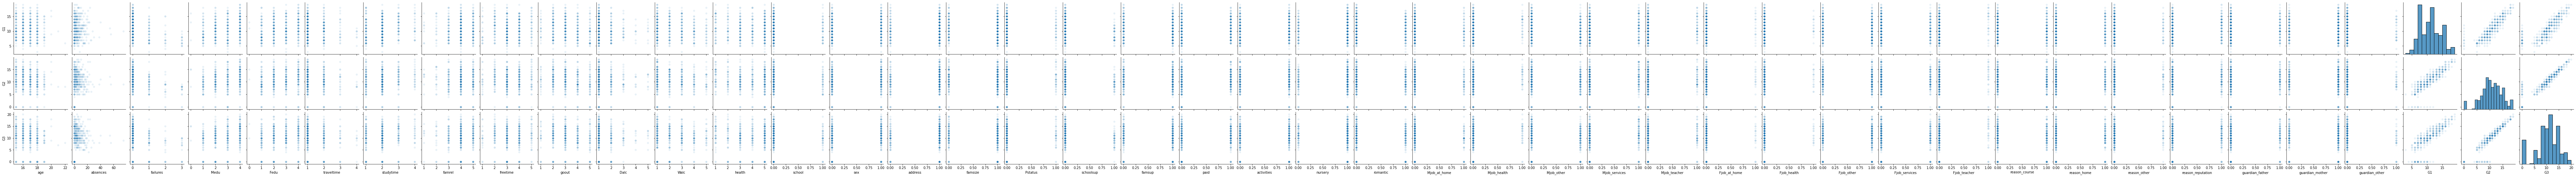


Language


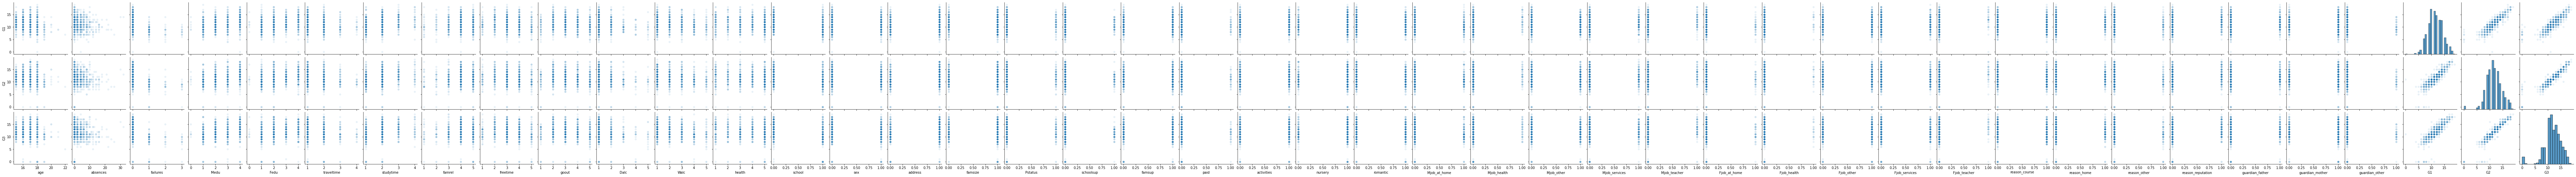

In [9]:
print('Math')
sns.pairplot(data_math, y_vars=response, plot_kws={'alpha': 0.1})
plt.savefig('math_pplot.png')
plt.show()

print('\nLanguage')
sns.pairplot(data_lang, y_vars=response, plot_kws={'alpha': 0.1})
plt.savefig('lang_pplot.png')
plt.show()

Math


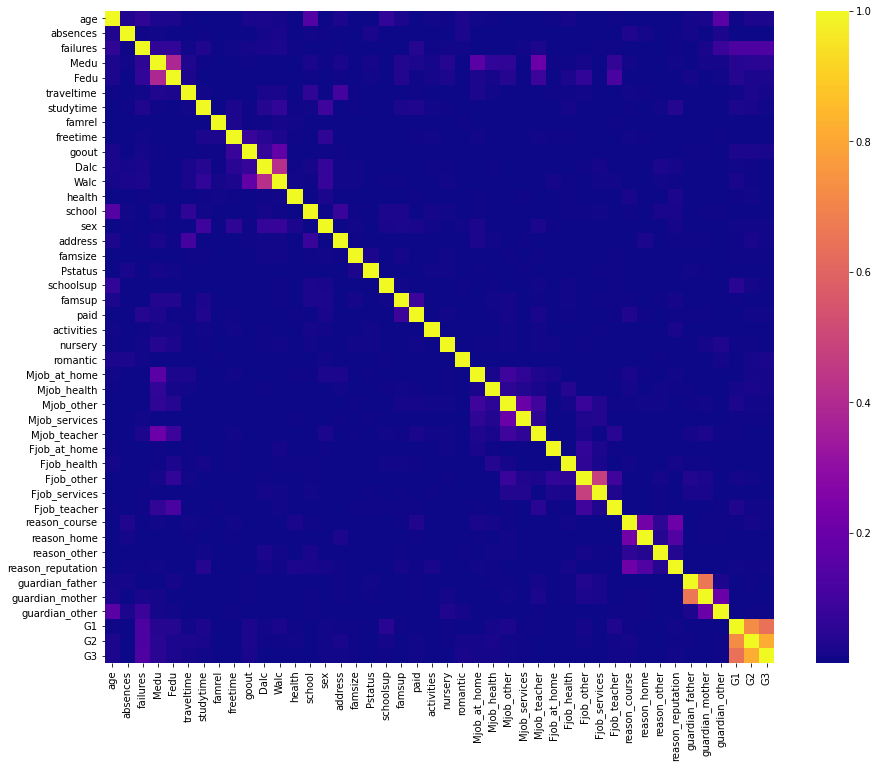


Lang


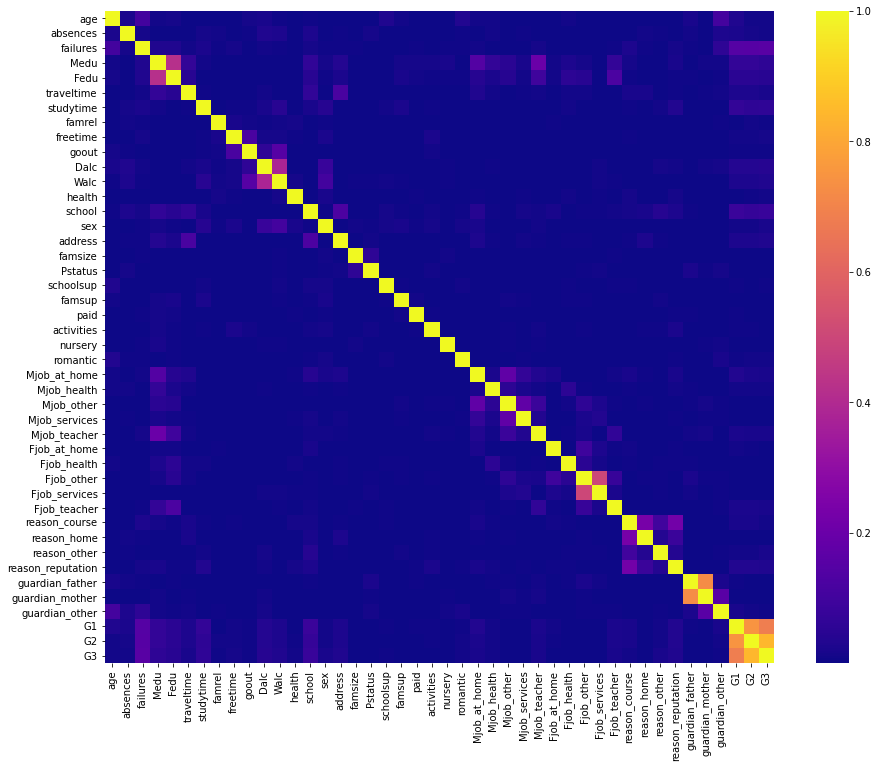

In [10]:
print('Math')
math_corr = data_math.corr().pow(2)
plt.figure(figsize=(15,12))
sns.heatmap(math_corr, cmap='plasma')
plt.savefig('math_corr.png')
plt.show()

print('\nLang')
lang_corr = data_lang.corr().pow(2)
plt.figure(figsize=(15,12))
sns.heatmap(lang_corr, cmap='plasma')
plt.savefig('lang_corr.png')
plt.show()

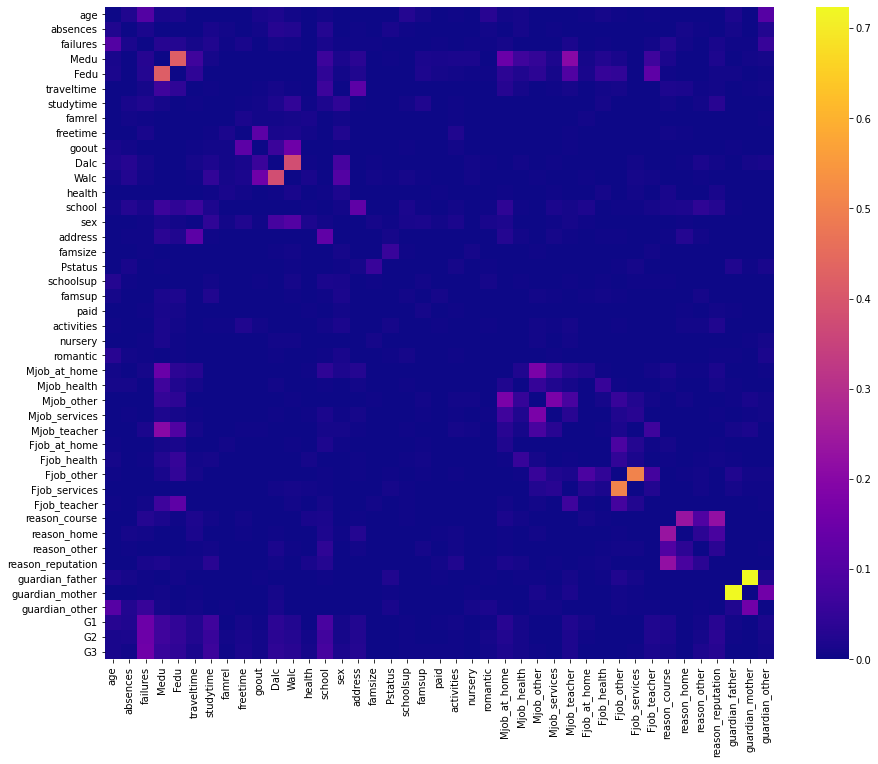

In [11]:
lang_corr = data_lang.corr().pow(2)
np.fill_diagonal(lang_corr.values, 0)
plt.figure(figsize=(15,12))
sns.heatmap(lang_corr.drop(labels=response, axis=1), cmap='plasma')
plt.savefig('lang_corr.png')

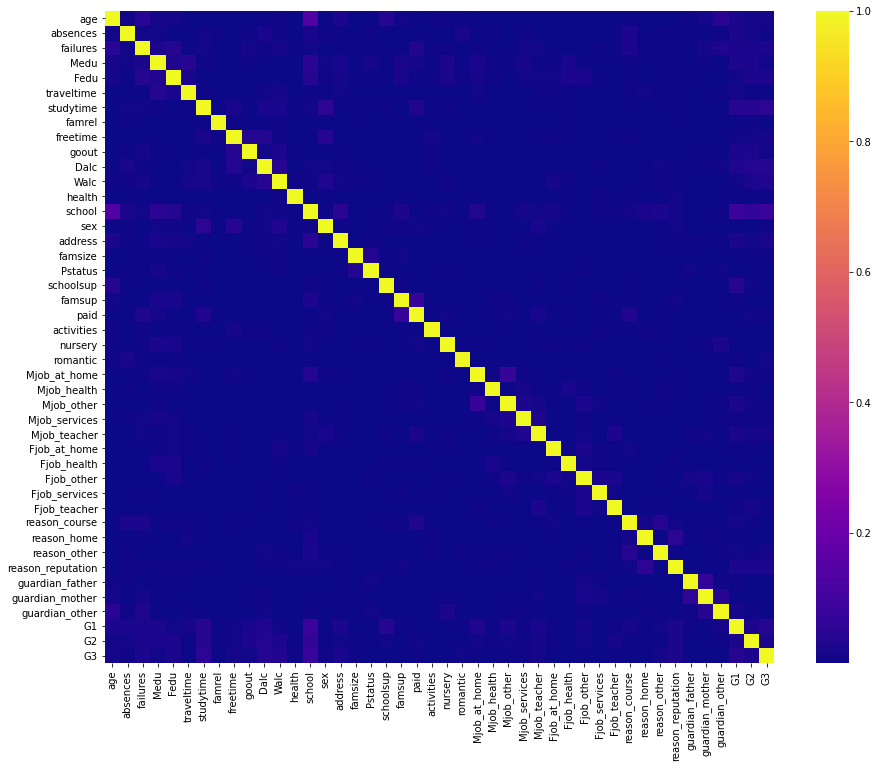

In [12]:
plt.figure(figsize=(15,12))
sns.heatmap((math_corr-lang_corr).abs(), cmap='plasma')
plt.show()

## TODO



## Who's Doing What

Pre-processing: Amos

Tree Regression: Mahvash

Linear Regression: N'yoma

In [13]:
# random forest

# first step splitting the data into training and test, training 80% and the test 20% of the data points
x = data_math.drop(['G1','G2', 'G3','absences'], axis='columns')
# y = data_math[['G1','G2', 'G3']]
y = data_math['G3']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(df.drop(['G1'], axis='columns'), digits.G1, test.size= 0.2)

In [14]:
np.sort(y.value_counts().index)

array([ 0,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20], dtype=int64)

In [15]:
display(len(X_train))
display(len(y_train))

316

316

## Amos Roche

- Pre-processing
   - Outliers?
   - Normalization?
   - Consider omitting Absences?
   - Alterations to one-hot encodings
   - Feature Selection
     - Correlation-based
     - PCA
     - Forward/Backward Selection

## Converting these two cells into Dummy variables using One Hot encoding


In [16]:
dummies = pd.get_dummies(x.Medu).iloc[:,1:]

x = pd.concat([dummies, x], axis=1)
x.drop(x.columns[3], axis=1, inplace=True)

x['Medu_1'] = x[1]
 
x['Medu_2']= x[2] 
x['Medu_3'] = x[3]

x= x.drop([1,2,3], axis=1)

x = x.drop(['Medu'], axis=1)

x


age  failures  Fedu  traveltime  studytime  famrel  freetime  goout  \
0     18         0     4           2          2       4         3      4   
1     17         0     1           1          2       5         3      3   
2     15         3     1           1          2       4         3      2   
3     15         0     2           1          3       3         2      2   
4     16         0     3           1          2       4         3      2   
..   ...       ...   ...         ...        ...     ...       ...    ...   
390   20         2     2           1          2       5         5      4   
391   17         0     1           2          1       2         4      5   
392   21         3     1           1          1       5         5      3   
393   18         0     2           3          1       4         4      1   
394   19         0     1           1          1       3         2      3   

     Dalc  Walc  ...  reason_course  reason_home  reason_other  \
0       1     1  ...              1            0             0   
1       1     1  ...              1            0             0   
2       2     3  ...              0            0             1   
3       1     1  ...              0            1             0   
4       1     2  ...              0            1             0   
..    ...   ...  ...            ...          ...           ...   
390     4     5  ...              1            0             0   
391     3     4  ...              1            0             0   
392     3     3  ...              1            0             0   
393     3     4  ...              1            0             0   
394     3     3  ...              1            0             0   

     reason_reputation  guardian_father  guardian_mother  guardian_other  \
0                    0                0                1               0   
1                    0                1                0               0   
2                    0                0                1               0   
3                    0                0                1               0   
4                    0                1                0               0   
..                 ...              ...              ...             ...   
390                  0                0                0               1   
391                  0                0                1               0   
392                  0                0                0               1   
393                  0                0                1               0   
394                  0                1                0               0   

     Medu_1  Medu_2  Medu_3  
0         0       0       0  
1         1       0       0  
2         1       0       0  
3         0       0       0  
4         0       0       1  
..      ...     ...     ...  
390       0       1       0  
391       0       0       1  
392       1       0       0  
393       0       0       1  
394       1       0       0  

[395 rows x 42 columns]

In [17]:
dummies1 = pd.get_dummies(x.Fedu).iloc[:,1:]
x3 = x
x3 = pd.concat([dummies, x3], axis=1)

x4 = x3

x4.drop(x4.columns[3], axis=1, inplace=True)
x4

x4['Fedu_1'] = x4[1]
 
x4['Fedu_2']= x4[2] 
x4['Fedu_3'] = x4[3]

x5= x4.drop([1,2,3], axis=1)

x6 = x5.drop(['Fedu'], axis=1)

print(x6.columns)
print(x.columns)


Index(['age', 'failures', 'traveltime', 'studytime', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'school', 'sex', 'address',
       'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'romantic', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'Medu_1', 'Medu_2', 'Medu_3',
       'Fedu_1', 'Fedu_2', 'Fedu_3'],
      dtype='object')
Index(['age', 'failures', 'Fedu', 'traveltime', 'studytime', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'school', 'sex',
       'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'romantic', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_h

## Standardizing the Dataframe before PCA

In [18]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
#Saving a copy of the original dataframe

x7 = x6
scaler = StandardScaler()
scaler.fit(x7)
x_scaled = scaler.transform(x7)
x_normal = pd.DataFrame(x_scaled, columns=x7.columns)



## Calculating the z-scores to detect outliers

In [19]:
#We will now look for outliers by calculating the Z-score

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(x_normal))
print(z)

x_normal_nooutliers = x_normal[(z < 3).all(axis=1)]

x_normal_nooutliers

[[1.02304645 0.44994364 0.79225076 ... 0.41904085 0.59391896 0.5783247 ]
 [0.23837976 0.44994364 0.64324947 ... 2.38640216 0.59391896 0.5783247 ]
 [1.33095364 3.58932316 0.64324947 ... 2.38640216 0.59391896 0.5783247 ]
 ...
 [3.37704655 3.58932316 0.64324947 ... 2.38640216 0.59391896 0.5783247 ]
 [1.02304645 0.44994364 2.22775098 ... 0.41904085 0.59391896 1.72913244]
 [1.80771315 0.44994364 0.64324947 ... 2.38640216 0.59391896 0.5783247 ]]


age  failures  traveltime  studytime    famrel  freetime     goout  \
1    0.238380 -0.449944   -0.643249  -0.042286  1.178860 -0.236010 -0.097908   
4   -0.546287 -0.449944   -0.643249  -0.042286  0.062194 -0.236010 -0.997295   
5   -0.546287 -0.449944   -0.643249  -0.042286  1.178860  0.766399 -0.997295   
6   -0.546287 -0.449944   -0.643249  -0.042286  0.062194  0.766399  0.801479   
8   -1.330954 -0.449944   -0.643249  -0.042286  0.062194 -1.238419 -0.997295   
..        ...       ...         ...        ...       ...       ...       ...   
384  1.023046  0.896479    0.792251  -1.235351  1.178860  0.766399 -0.097908   
387  1.807713  0.896479   -0.643249   1.150779  1.178860  0.766399 -0.997295   
388  1.023046 -0.449944   -0.643249  -0.042286  0.062194 -0.236010  0.801479   
391  0.238380 -0.449944    0.792251  -1.235351 -2.171138  0.766399  1.700867   
393  1.023046 -0.449944    2.227751  -1.235351  0.062194  0.766399 -1.896683   

         Dalc      Walc    health  ...  reason_reputation  guardian_father  \
1   -0.540699 -1.003789 -0.399289  ...          -0.601722         1.840894   
4   -0.540699 -0.226345  1.041070  ...          -0.601722         1.840894   
5   -0.540699 -0.226345  1.041070  ...           1.661898        -0.543214   
6   -0.540699 -1.003789 -0.399289  ...          -0.601722        -0.543214   
8   -0.540699 -1.003789 -1.839649  ...          -0.601722        -0.543214   
..        ...       ...       ...  ...                ...              ...   
384  2.831553  0.551100 -0.399289  ...          -0.601722         1.840894   
387 -0.540699 -0.226345  1.041070  ...          -0.601722        -0.543214   
388 -0.540699 -1.003789 -1.839649  ...          -0.601722        -0.543214   
391  1.707469  1.328545 -1.119469  ...          -0.601722        -0.543214   
393  1.707469  1.328545  1.041070  ...          -0.601722        -0.543214   

     guardian_mother  guardian_other    Medu_1    Medu_2    Medu_3    Fedu_1  \
1          -1.495896       -0.296908  2.386402 -0.593919 -0.578325  2.386402   
4          -1.495896       -0.296908 -0.419041 -0.593919  1.729132 -0.419041   
5           0.668496       -0.296908 -0.419041 -0.593919 -0.578325 -0.419041   
6           0.668496       -0.296908 -0.419041  1.683731 -0.578325 -0.419041   
8           0.668496       -0.296908 -0.419041 -0.593919  1.729132 -0.419041   
..               ...             ...       ...       ...       ...       ...   
384        -1.495896       -0.296908 -0.419041 -0.593919 -0.578325 -0.419041   
387         0.668496       -0.296908 -0.419041  1.683731 -0.578325 -0.419041   
388         0.668496       -0.296908 -0.419041 -0.593919  1.729132 -0.419041   
391         0.668496       -0.296908 -0.419041 -0.593919  1.729132 -0.419041   
393         0.668496       -0.296908 -0.419041 -0.593919  1.729132 -0.419041   

       Fedu_2    Fedu_3  
1   -0.593919 -0.578325  
4   -0.593919  1.729132  
5   -0.593919 -0.578325  
6    1.683731 -0.578325  
8   -0.593919  1.729132  
..        ...       ...  
384 -0.593919 -0.578325  
387  1.683731 -0.578325  
388 -0.593919  1.729132  
391 -0.593919  1.729132  
393 -0.593919  1.729132  

[229 rows x 44 columns]

## Trying to remove correlated features

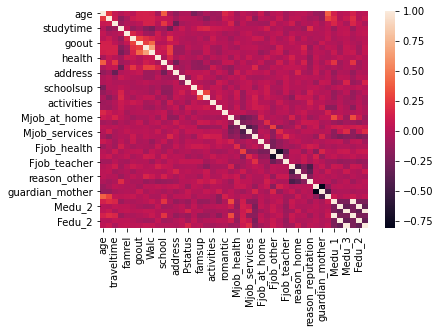

In [20]:
import seaborn as sns

sns.heatmap(x7.corr())


columns = np.full((x7.corr().shape[0],), True, dtype=bool)
for i in range(x7.corr().shape[0]):
    for j in range(i+1, x7.corr().shape[0]):
        if x7.corr().iloc[i,j] >= 0.5:
            if columns[j]:
                columns[j] = False
selected_columns = x7.columns[columns]


#We will now filter the columns that was selected, correlation variables above 0.5 were removed
x_normal1 = x_normal[selected_columns]
x_normal_nooutliers1 = x_normal_nooutliers[selected_columns]

## Dropping absences

In [21]:

x_normal2 = x_normal1
x_normal_nooutliers2 = x_normal_nooutliers1
x_normal2.columns

Index(['age', 'failures', 'traveltime', 'studytime', 'famrel', 'freetime',
       'goout', 'Dalc', 'health', 'school', 'sex', 'address', 'famsize',
       'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'romantic', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'Medu_1', 'Medu_2', 'Medu_3'],
      dtype='object')

## Running PCA using the standardized dataset (didn't remove outliers)

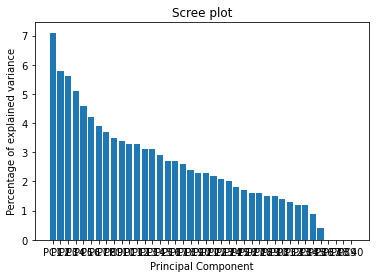

In [22]:
from sklearn.decomposition import PCA
from sklearn import preprocessing 

pca = PCA()
pca.fit(x_normal2)
pca_data = pca.transform(x_normal2)

per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
label = ['PC' + str(x) for x in range(1, len(per_var)+1)]
pca_df = pd.DataFrame(pca_data,  columns=label)
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label = label)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Principal Component')
plt.title('Scree plot')
plt.show()





## Seeing the eigenvalues for the principal components

77.6
40


Text(0, 0.5, 'Eigenvalues')

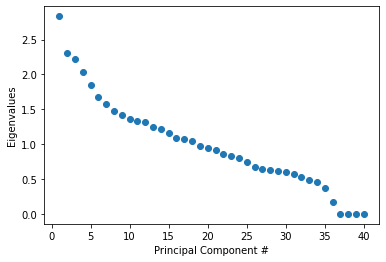

In [23]:
print(per_var[0]+per_var[1]+per_var[2]+per_var[3]+per_var[4]+per_var[5]+per_var[6]+per_var[7]+per_var[8]+per_var[9]+per_var[10]+per_var[11]+per_var[12]+per_var[13]+per_var[14]+per_var[15]+per_var[16]+per_var[17]+per_var[18]+per_var[19]+per_var[20])
eigenvalues = pca.explained_variance_
print(len(eigenvalues))
nums = np.arange(1,41)

plt.scatter(nums, eigenvalues)
plt.xlabel('Principal Component #')
plt.ylabel('Eigenvalues')

In [24]:
print('*************** PCA Summary ***************')
print('No. of features: ', pca.n_features_)
print('No. of samples: ', pca.n_samples_)
print('No. of components: ', pca.n_components_)
print('Explained variance ratio: ', pca.explained_variance_ratio_)

*************** PCA Summary ***************
No. of features:  40
No. of samples:  395
No. of components:  40
Explained variance ratio:  [7.07017481e-02 5.76734022e-02 5.55573256e-02 5.07977779e-02
 4.60831774e-02 4.17883990e-02 3.93603213e-02 3.67634909e-02
 3.52310665e-02 3.41013122e-02 3.33939942e-02 3.27398259e-02
 3.12397127e-02 3.05495434e-02 2.90048153e-02 2.72204837e-02
 2.67285798e-02 2.59198811e-02 2.42593095e-02 2.34819907e-02
 2.27158848e-02 2.15418152e-02 2.07209391e-02 1.98999624e-02
 1.84904923e-02 1.68744671e-02 1.59702821e-02 1.58301446e-02
 1.53163045e-02 1.50230542e-02 1.43230447e-02 1.32677729e-02
 1.21642467e-02 1.15136726e-02 9.43585684e-03 4.31590253e-03
 1.39434612e-32 3.36458337e-33 2.88469845e-33 2.38459457e-33]


## 3-D Scatterplot of the principal components

<ipython-input-25-e6c7dff7ede6>:11: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0, 'PC3 - 5.6%')

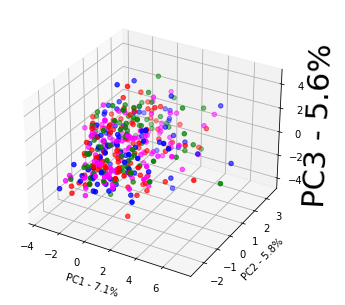

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization!
fig = plt.figure()
n_samples=395
labels   = [np.random.choice(['A','B','C','D']) for i in range(n_samples)]
label_color_dict = {'A':'red','B':'green','C':'blue','D':'magenta'}

# Color vector creation
cvec = [label_color_dict[label] for label in labels]

ax = Axes3D(fig)





ax.scatter(pca_df.PC1, pca_df.PC2, pca_df.PC3,c=cvec)
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
ax.set_zlabel('PC3 - {0}%'.format(per_var[2]), fontsize=30, rotation=60)

## Running PCA using the standardized dataset (Outliers removed)

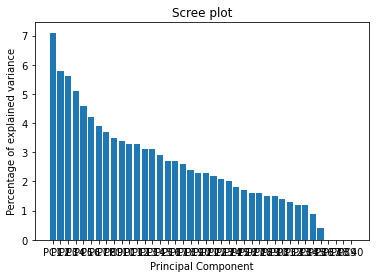

In [26]:
from sklearn.decomposition import PCA
from sklearn import preprocessing 

pca1 = PCA()
pca1.fit(x_normal_nooutliers2)
pca_data1 = pca1.transform(x_normal_nooutliers2)
pca_df1 = pd.DataFrame(pca_data1,  columns=label)
per_var1 = np.round(pca1.explained_variance_ratio_*100, decimals=1)
label1 = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label = label)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Principal Component')
plt.title('Scree plot')
plt.show()





## Seeing the eigenvalues

40


Text(0, 0.5, 'Eigenvalues')

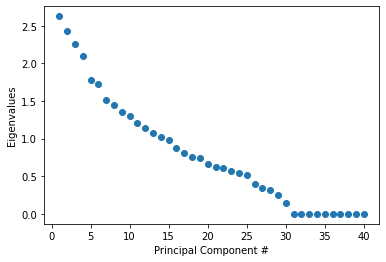

In [27]:
eigenvalues = pca1.explained_variance_
print(len(eigenvalues))
nums = np.arange(1,41)

plt.scatter(nums, eigenvalues)
plt.xlabel('Principal Component #')
plt.ylabel('Eigenvalues')

<ipython-input-28-32e989ff6c36>:11: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0, 'PC3 - 7.0%')

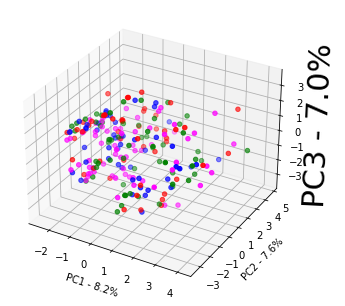

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization!
fig = plt.figure()
n_samples=229
labels   = [np.random.choice(['A','B','C','D']) for i in range(n_samples)]
label_color_dict = {'A':'red','B':'green','C':'blue','D':'magenta'}

# Color vector creation
cvec = [label_color_dict[label] for label in labels]

ax = Axes3D(fig)





ax.scatter(pca_df1.PC1, pca_df1.PC2, pca_df1.PC3,c=cvec)
plt.xlabel('PC1 - {0}%'.format(per_var1[0]))
plt.ylabel('PC2 - {0}%'.format(per_var1[1]))
ax.set_zlabel('PC3 - {0}%'.format(per_var1[2]), fontsize=30, rotation=60)

## Attempting PLS regression using the Standardized Datasets (outliers weren't removed)

In [29]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(x_normal2, y, test_size=0.2,random_state=0)

pls2 = PLSRegression(n_components=2)
pls2.fit(X_train, y_train)
Y_pred = pls2.predict(X_test)
mean_squared_error(y_test, Y_pred)

23.100658179444878

In [30]:
from sklearn.model_selection import RepeatedKFold, cross_val_score

## Cross-Validation for to see number of PLS components  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:93: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:325: RuntimeWarning: invalid value encountered in true_divide
  x_loadings = np.dot(x_scores, Xk) / np.dot(x_scores, x_scores)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:334: RuntimeWarning: invalid value encountered in true_divide
  y_loadings = np.dot(x_scores, Yk) / np.dot(x_scores, x_scores)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, 

Text(0.5, 1.0, 'hp')

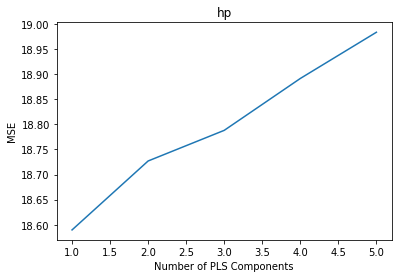

In [31]:
#define cross-validation method
from sklearn.model_selection import RepeatedKFold, cross_val_score

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []
n = len(x_normal2)

# Calculate MSE with only the intercept
score = -1*cross_val_score(PLSRegression(n_components=1),
           np.ones((n,1)), y, cv=cv, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    pls = PLSRegression(n_components=i)
    score = -1*cross_val_score(pls, x_normal2, y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

#plot test MSE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('hp')

In [32]:
pls2 = PLSRegression(n_components=5)
pls2.fit(X_train[selected_columns], y_train)
Y_pred = pls2.predict(X_test[selected_columns])
np.sqrt(mean_squared_error(y_test, Y_pred))

4.78529058465152

In [33]:
pca_df.columns


Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19',
       'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28',
       'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37',
       'PC38', 'PC39', 'PC40'],
      dtype='object')

In [34]:
pca_new = pca_df1[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19',
       'PC20']]

In [35]:
# from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate, KFold
# from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
# from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, make_scorer, precision_score
from sklearn.metrics import mean_squared_error as mse

X_train, X_test, y_train, y_test = train_test_split(pca_df, y, test_size=0.2,random_state=0)

rf = RandomForestRegressor(n_estimators=100, max_depth=3)


# evaluating the test MSE
#display(np.sqrt(mse(y_test, rf.predict(X_test))))


## Seeing the correlations between the features and components



 PCA :

[[ 3.23318736e-01  4.61520377e-02]
 [ 2.76299301e-01  1.05997002e-01]
 [ 2.35912979e-01 -7.18721355e-02]
 [-2.07618036e-01 -2.93498307e-02]
 [ 6.88379053e-03  1.06714151e-03]
 [ 1.05628984e-01  5.36313316e-02]
 [ 8.98578343e-02  8.04957791e-03]
 [ 2.02127224e-01  1.50339606e-01]
 [ 3.57086049e-02  6.00877045e-02]
 [ 3.11093722e-01  5.55666299e-02]
 [ 1.20661066e-01  7.23771529e-02]
 [-1.90619181e-01  1.13311693e-01]
 [-4.36133556e-02 -1.65158736e-02]
 [-4.81875584e-02 -3.79848718e-02]
 [-1.23063947e-01 -1.63236947e-02]
 [-2.20768453e-01  3.19154053e-02]
 [-2.01604162e-01  1.34566903e-02]
 [-1.00461718e-01  5.29446017e-02]
 [-2.00298407e-01  2.19445082e-02]
 [ 6.24289221e-02  5.22527333e-02]
 [ 1.56213077e-01 -9.97192520e-02]
 [-1.42387573e-01  1.05510502e-01]
 [ 1.28243272e-01 -2.55295245e-01]
 [-6.50561665e-02  2.38004871e-01]
 [-1.37380715e-01  6.71545173e-02]
 [ 2.17169325e-02  5.21300729e-02]
 [-1.72206581e-01  1.24556486e-01]
 [ 6.21995660e-02 -5.13824588e-01]
 [ 4.93492

<ipython-input-36-b6699c272dda>:30: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
<ipython-input-36-b6699c272dda>:30: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


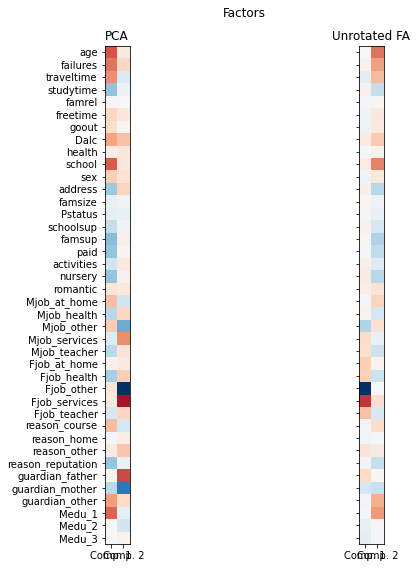

In [36]:
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from statsmodels.multivariate.factor_rotation import rotate_factors


n_comps = 2

feature_names = x_normal2.columns

methods = [
    ("PCA", PCA()),
    ("Unrotated FA", FactorAnalysis())
    
   
]
fig, axes = plt.subplots(ncols=len(methods), figsize=(10, 8))

for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components=n_comps)
    fa.fit(x_normal2)

    components = fa.components_.T
    print("\n\n %s :\n" % method)
    print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
    ax.set_yticks(np.arange(len(feature_names)))
    if ax.is_first_col():
        ax.set_yticklabels(feature_names)
    else:
        ax.set_yticklabels([])
    ax.set_title(str(method))
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Comp. 1", "Comp. 2"])
fig.suptitle("Factors")
plt.tight_layout()
plt.show()

## Trying to Rotate the dataframe

In [37]:
fa = FactorAnalyzer(n_factors=3, rotation='promax', method='minres')
fa.fit(x_normal2)
data = fa.transform(x_normal2)

per_var2 = np.round(fa.get_factor_variance(), decimals=1)
dframe1 = pd.DataFrame(data, columns = ['PC1', 'PC2', 'PC3'])
# dframe

# dframe.columns

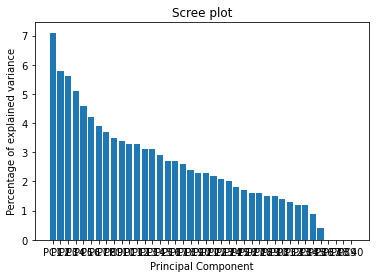

In [38]:
per_var2 = np.round(fa.get_factor_variance(), decimals=1)
label1 = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label = label1)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Principal Component')
plt.title('Scree plot')
plt.show()

<ipython-input-39-b574dc780e75>:11: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0, 'PC3 - [0.1 0.1 0.1]%')

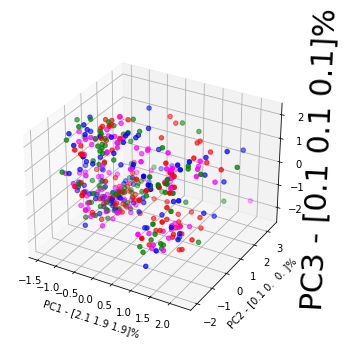

In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization!
fig = plt.figure()
n_samples=395
labels   = [np.random.choice(['A','B','C','D']) for i in range(n_samples)]
label_color_dict = {'A':'red','B':'green','C':'blue','D':'magenta'}

# Color vector creation
cvec = [label_color_dict[label] for label in labels]

ax = Axes3D(fig)





ax.scatter(dframe1.PC1, dframe1.PC2, dframe1.PC3,c=cvec)
plt.xlabel('PC1 - {0}%'.format(per_var2[0]))
plt.ylabel('PC2 - {0}%'.format(per_var2[1]))
ax.set_zlabel('PC3 - {0}%'.format(per_var2[2]), fontsize=30, rotation=60)

## Language Data

In [40]:
x = data_lang.drop(['G1','G2', 'G3'], axis='columns')
# y = data_math[['G1','G2', 'G3']]
y = data_lang['G3']

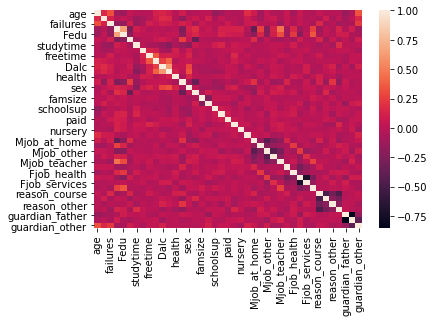

In [41]:
import seaborn as sns

sns.heatmap(x.corr())

x_lang_corr = pd.DataFrame(x.corr())

## Removing Correlated features

In [42]:
columns = np.full((x_lang_corr.shape[0],), True, dtype=bool)
for i in range(x_lang_corr.shape[0]):
    for j in range(i+1, x_lang_corr.corr().shape[0]):
        if (x_lang_corr.iloc[i,j] >= 0.5) or (x_lang_corr.iloc[i,j]<=-0.5):
            if columns[j]:
                columns[j] = False
selected_columns = x.columns[columns]

In [43]:
len(selected_columns)

37

In [44]:
x1 = x[selected_columns]
x1



age  absences  failures  Medu  traveltime  studytime  famrel  freetime  \
0     18         4         0     4           2          2       4         3   
1     17         2         0     1           1          2       5         3   
2     15         6         0     1           1          2       4         3   
3     15         0         0     4           1          3       3         2   
4     16         0         0     3           1          2       4         3   
..   ...       ...       ...   ...         ...        ...     ...       ...   
644   19         4         1     2           1          3       5         4   
645   18         4         0     3           1          2       4         3   
646   18         6         0     1           2          2       1         1   
647   17         6         0     3           2          1       2         4   
648   18         4         0     3           3          1       4         4   

     goout  Dalc  ...  Fjob_at_home  Fjob_health  Fjob_other  Fjob_teacher  \
0        4     1  ...             0            0           0             1   
1        3     1  ...             0            0           1             0   
2        2     2  ...             0            0           1             0   
3        2     1  ...             0            0           0             0   
4        2     1  ...             0            0           1             0   
..     ...   ...  ...           ...          ...         ...           ...   
644      2     1  ...             0            0           1             0   
645      4     1  ...             0            0           0             0   
646      1     1  ...             0            0           1             0   
647      5     3  ...             0            0           0             0   
648      1     3  ...             0            0           1             0   

     reason_course  reason_home  reason_other  reason_reputation  \
0                1            0             0                  0   
1                1            0             0                  0   
2                0            0             1                  0   
3                0            1             0                  0   
4                0            1             0                  0   
..             ...          ...           ...                ...   
644              1            0             0                  0   
645              1            0             0                  0   
646              1            0             0                  0   
647              1            0             0                  0   
648              1            0             0                  0   

     guardian_father  guardian_other  
0                  0               0  
1                  1               0  
2                  0               0  
3                  0               0  
4                  1               0  
..               ...             ...  
644                0               0  
645                0               0  
646                0               0  
647                0               0  
648                0               0  

[649 rows x 37 columns]

## One Hot encoding the "Medu" Variable

In [45]:
dummies = pd.get_dummies(x1.Medu).iloc[:,1:]

x1 = pd.concat([dummies, x1], axis=1)
x1.drop(x1.columns[3], axis=1, inplace=True)

x1['Medu_1']=1
x1['Medu_2']=1
x1['Medu_3']=1

x1['Medu_1'] = x1[1]
 
x1['Medu_2']= x1[2] 
x1['Medu_3'] = x1[3]

x1= x1.drop([1,2,3], axis=1)

x1= x1.drop(['Medu'], axis=1)



## Standardizing the Data

In [46]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
#Saving a copy of the original dataframe


scaler = StandardScaler()
scaler.fit(x1)
x_scaled = scaler.transform(x1)
x_normal = pd.DataFrame(x_scaled, columns=x1.columns)

In [47]:
x_normal

age  absences  failures  traveltime  studytime    famrel  freetime  \
0    1.031695  0.073433 -0.374305    0.576718   0.083653  0.072606 -0.171647   
1    0.210137 -0.357863 -0.374305   -0.760032   0.083653  1.119748 -0.171647   
2   -1.432980  0.504730 -0.374305   -0.760032   0.083653  0.072606 -0.171647   
3   -1.432980 -0.789159 -0.374305   -0.760032   1.290114 -0.974536 -1.123771   
4   -0.611422 -0.789159 -0.374305   -0.760032   0.083653  0.072606 -0.171647   
..        ...       ...       ...         ...        ...       ...       ...   
644  1.853254  0.073433  1.312667   -0.760032   1.290114  1.119748  0.780478   
645  1.031695  0.073433 -0.374305   -0.760032   0.083653  0.072606 -0.171647   
646  1.031695  0.504730 -0.374305    0.576718   0.083653 -3.068820 -2.075896   
647  0.210137  0.504730 -0.374305    0.576718  -1.122808 -2.021678  0.780478   
648  1.031695  0.073433 -0.374305    1.913468  -1.122808  0.072606  0.780478   

        goout      Dalc    health  ...  Fjob_teacher  reason_course  \
0    0.693785 -0.543555 -0.371042  ...      4.126473       1.130130   
1   -0.157380 -0.543555 -0.371042  ...     -0.242338       1.130130   
2   -1.008546  0.538553 -0.371042  ...     -0.242338      -0.884854   
3   -1.008546 -0.543555  1.012903  ...     -0.242338      -0.884854   
4   -1.008546 -0.543555  1.012903  ...     -0.242338      -0.884854   
..        ...       ...       ...  ...           ...            ...   
644 -1.008546 -0.543555  1.012903  ...     -0.242338       1.130130   
645  0.693785 -0.543555 -1.754987  ...     -0.242338       1.130130   
646 -1.859711 -0.543555  1.012903  ...     -0.242338       1.130130   
647  1.544950  1.620662 -1.063015  ...     -0.242338       1.130130   
648 -1.859711  1.620662  1.012903  ...     -0.242338       1.130130   

     reason_home  reason_other  reason_reputation  guardian_father  \
0      -0.545894     -0.353247           -0.53161        -0.555399   
1      -0.545894     -0.353247           -0.53161         1.800508   
2      -0.545894      2.830881           -0.53161        -0.555399   
3       1.831858     -0.353247           -0.53161        -0.555399   
4       1.831858     -0.353247           -0.53161         1.800508   
..           ...           ...                ...              ...   
644    -0.545894     -0.353247           -0.53161        -0.555399   
645    -0.545894     -0.353247           -0.53161        -0.555399   
646    -0.545894     -0.353247           -0.53161        -0.555399   
647    -0.545894     -0.353247           -0.53161        -0.555399   
648    -0.545894     -0.353247           -0.53161        -0.555399   

     guardian_other   Medu_1    Medu_2    Medu_3  
0         -0.259681 -0.53161 -0.633820 -0.522062  
1         -0.259681  1.88108 -0.633820 -0.522062  
2         -0.259681  1.88108 -0.633820 -0.522062  
3         -0.259681 -0.53161 -0.633820 -0.522062  
4         -0.259681 -0.53161 -0.633820  1.915480  
..              ...      ...       ...       ...  
644       -0.259681 -0.53161  1.577735 -0.522062  
645       -0.259681 -0.53161 -0.633820  1.915480  
646       -0.259681  1.88108 -0.633820 -0.522062  
647       -0.259681 -0.53161 -0.633820  1.915480  
648       -0.259681 -0.53161 -0.633820  1.915480  

[649 rows x 39 columns]

## Removing the Outliers

In [48]:

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(x_normal))
print(z)

x_normal_nooutliers = x_normal[(z < 3).all(axis=1)]

x_normal_nooutliers

[[1.03169516 0.07343336 0.37430512 ... 0.53160953 0.63382005 0.52206228]
 [0.21013668 0.35786305 0.37430512 ... 1.88107989 0.63382005 0.52206228]
 [1.43298028 0.50472977 0.37430512 ... 1.88107989 0.63382005 0.52206228]
 ...
 [1.03169516 0.50472977 0.37430512 ... 1.88107989 0.63382005 0.52206228]
 [0.21013668 0.50472977 0.37430512 ... 0.53160953 0.63382005 1.91548029]
 [1.03169516 0.07343336 0.37430512 ... 0.53160953 0.63382005 1.91548029]]


age  absences  failures  traveltime  studytime    famrel  freetime  \
1    0.210137 -0.357863 -0.374305   -0.760032   0.083653  1.119748 -0.171647   
2   -1.432980  0.504730 -0.374305   -0.760032   0.083653  0.072606 -0.171647   
4   -0.611422 -0.789159 -0.374305   -0.760032   0.083653  0.072606 -0.171647   
5   -0.611422  0.504730 -0.374305   -0.760032   0.083653  1.119748  0.780478   
6   -0.611422 -0.789159 -0.374305   -0.760032   0.083653  0.072606  0.780478   
..        ...       ...       ...         ...        ...       ...       ...   
642  0.210137 -0.789159 -0.374305    0.576718   0.083653  1.119748  1.732603   
644  1.853254  0.073433  1.312667   -0.760032   1.290114  1.119748  0.780478   
645  1.031695  0.073433 -0.374305   -0.760032   0.083653  0.072606 -0.171647   
647  0.210137  0.504730 -0.374305    0.576718  -1.122808 -2.021678  0.780478   
648  1.031695  0.073433 -0.374305    1.913468  -1.122808  0.072606  0.780478   

        goout      Dalc    health  ...  Fjob_teacher  reason_course  \
1   -0.157380 -0.543555 -0.371042  ...     -0.242338       1.130130   
2   -1.008546  0.538553 -0.371042  ...     -0.242338      -0.884854   
4   -1.008546 -0.543555  1.012903  ...     -0.242338      -0.884854   
5   -1.008546 -0.543555  1.012903  ...     -0.242338      -0.884854   
6    0.693785 -0.543555 -0.371042  ...     -0.242338      -0.884854   
..        ...       ...       ...  ...           ...            ...   
642  0.693785 -0.543555 -1.754987  ...     -0.242338      -0.884854   
644 -1.008546 -0.543555  1.012903  ...     -0.242338       1.130130   
645  0.693785 -0.543555 -1.754987  ...     -0.242338       1.130130   
647  1.544950  1.620662 -1.063015  ...     -0.242338       1.130130   
648 -1.859711  1.620662  1.012903  ...     -0.242338       1.130130   

     reason_home  reason_other  reason_reputation  guardian_father  \
1      -0.545894     -0.353247           -0.53161         1.800508   
2      -0.545894      2.830881           -0.53161        -0.555399   
4       1.831858     -0.353247           -0.53161         1.800508   
5      -0.545894     -0.353247            1.88108        -0.555399   
6       1.831858     -0.353247           -0.53161        -0.555399   
..           ...           ...                ...              ...   
642    -0.545894      2.830881           -0.53161        -0.555399   
644    -0.545894     -0.353247           -0.53161        -0.555399   
645    -0.545894     -0.353247           -0.53161        -0.555399   
647    -0.545894     -0.353247           -0.53161        -0.555399   
648    -0.545894     -0.353247           -0.53161        -0.555399   

     guardian_other   Medu_1    Medu_2    Medu_3  
1         -0.259681  1.88108 -0.633820 -0.522062  
2         -0.259681  1.88108 -0.633820 -0.522062  
4         -0.259681 -0.53161 -0.633820  1.915480  
5         -0.259681 -0.53161 -0.633820 -0.522062  
6         -0.259681 -0.53161  1.577735 -0.522062  
..              ...      ...       ...       ...  
642       -0.259681 -0.53161 -0.633820 -0.522062  
644       -0.259681 -0.53161  1.577735 -0.522062  
645       -0.259681 -0.53161 -0.633820  1.915480  
647       -0.259681 -0.53161 -0.633820  1.915480  
648       -0.259681 -0.53161 -0.633820  1.915480  

[393 rows x 39 columns]

## Dropping Absences

In [49]:

x_normal2 = x_normal.drop(['absences'], axis=1)
x_normal_nooutliers2 = x_normal_nooutliers.drop(['absences'], axis=1)
x_normal2.columns
x_normal2

age  failures  traveltime  studytime    famrel  freetime     goout  \
0    1.031695 -0.374305    0.576718   0.083653  0.072606 -0.171647  0.693785   
1    0.210137 -0.374305   -0.760032   0.083653  1.119748 -0.171647 -0.157380   
2   -1.432980 -0.374305   -0.760032   0.083653  0.072606 -0.171647 -1.008546   
3   -1.432980 -0.374305   -0.760032   1.290114 -0.974536 -1.123771 -1.008546   
4   -0.611422 -0.374305   -0.760032   0.083653  0.072606 -0.171647 -1.008546   
..        ...       ...         ...        ...       ...       ...       ...   
644  1.853254  1.312667   -0.760032   1.290114  1.119748  0.780478 -1.008546   
645  1.031695 -0.374305   -0.760032   0.083653  0.072606 -0.171647  0.693785   
646  1.031695 -0.374305    0.576718   0.083653 -3.068820 -2.075896 -1.859711   
647  0.210137 -0.374305    0.576718  -1.122808 -2.021678  0.780478  1.544950   
648  1.031695 -0.374305    1.913468  -1.122808  0.072606  0.780478 -1.859711   

         Dalc    health    school  ...  Fjob_teacher  reason_course  \
0   -0.543555 -0.371042 -0.730944  ...      4.126473       1.130130   
1   -0.543555 -0.371042 -0.730944  ...     -0.242338       1.130130   
2    0.538553 -0.371042 -0.730944  ...     -0.242338      -0.884854   
3   -0.543555  1.012903 -0.730944  ...     -0.242338      -0.884854   
4   -0.543555  1.012903 -0.730944  ...     -0.242338      -0.884854   
..        ...       ...       ...  ...           ...            ...   
644 -0.543555  1.012903  1.368094  ...     -0.242338       1.130130   
645 -0.543555 -1.754987  1.368094  ...     -0.242338       1.130130   
646 -0.543555  1.012903  1.368094  ...     -0.242338       1.130130   
647  1.620662 -1.063015  1.368094  ...     -0.242338       1.130130   
648  1.620662  1.012903  1.368094  ...     -0.242338       1.130130   

     reason_home  reason_other  reason_reputation  guardian_father  \
0      -0.545894     -0.353247           -0.53161        -0.555399   
1      -0.545894     -0.353247           -0.53161         1.800508   
2      -0.545894      2.830881           -0.53161        -0.555399   
3       1.831858     -0.353247           -0.53161        -0.555399   
4       1.831858     -0.353247           -0.53161         1.800508   
..           ...           ...                ...              ...   
644    -0.545894     -0.353247           -0.53161        -0.555399   
645    -0.545894     -0.353247           -0.53161        -0.555399   
646    -0.545894     -0.353247           -0.53161        -0.555399   
647    -0.545894     -0.353247           -0.53161        -0.555399   
648    -0.545894     -0.353247           -0.53161        -0.555399   

     guardian_other   Medu_1    Medu_2    Medu_3  
0         -0.259681 -0.53161 -0.633820 -0.522062  
1         -0.259681  1.88108 -0.633820 -0.522062  
2         -0.259681  1.88108 -0.633820 -0.522062  
3         -0.259681 -0.53161 -0.633820 -0.522062  
4         -0.259681 -0.53161 -0.633820  1.915480  
..              ...      ...       ...       ...  
644       -0.259681 -0.53161  1.577735 -0.522062  
645       -0.259681 -0.53161 -0.633820  1.915480  
646       -0.259681  1.88108 -0.633820 -0.522062  
647       -0.259681 -0.53161 -0.633820  1.915480  
648       -0.259681 -0.53161 -0.633820  1.915480  

[649 rows x 38 columns]

## Running PCA with the standardized data (outliers weren't removed)

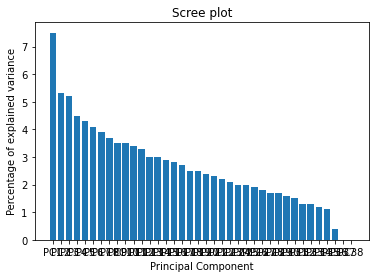

In [50]:
from sklearn.decomposition import PCA
from sklearn import preprocessing 

pca2 = PCA()
pca2.fit(x_normal2)
pca_data2 = pca2.transform(x_normal2)

per_var3 = np.round(pca2.explained_variance_ratio_*100, decimals=1)
label = ['PC' + str(x) for x in range(1, len(per_var3)+1)]

plt.bar(x=range(1, len(per_var3)+1), height=per_var3, tick_label = label)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Principal Component')
plt.title('Scree plot')
plt.show()





In [51]:
pca_dframe_lang = pd.DataFrame(pca_data2, columns=label)

pca_dframe_lang

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -0.093172 -1.146188 -1.110271  1.937625  0.290124  1.524415  0.021897   
1    1.161697 -0.367198 -1.490568  0.513683  0.053476  0.448552 -0.677418   
2    0.445739 -0.450086 -1.988681 -0.636072  2.146069 -0.215890 -0.662121   
3   -2.558650 -0.309577 -1.273151  1.038036  1.151491  0.313466  0.637917   
4   -1.657966  1.982578 -0.433677 -0.385047  1.419623  0.666426 -1.448575   
..        ...       ...       ...       ...       ...       ...       ...   
644  1.152210  0.234104  0.541495  0.380720 -2.852322 -0.223694 -1.316877   
645 -0.513126 -1.206018 -0.031538  1.768343  0.183341  0.633811  0.667790   
646  1.763980  0.991445 -1.868041  0.533994  0.298906  1.646893  0.102144   
647  0.670329 -1.127458  2.583278  0.049871  0.670915 -0.640453 -1.710068   
648  1.706169 -0.461950  2.081374 -0.780956 -0.206399 -0.250559 -2.275189   

          PC8       PC9      PC10  ...      PC29      PC30      PC31  \
0    0.127751 -0.789646 -0.883479  ...  0.690205  0.144902  0.402974   
1   -1.127212  1.698118 -0.747205  ... -0.476107  0.308051  0.154421   
2    1.401298  0.905255 -1.498653  ... -0.199660 -0.907925 -0.232832   
3   -0.231250  1.167667  1.770003  ...  0.401993  0.106567  1.001180   
4   -1.322560  1.303393 -0.514826  ... -0.393150 -0.096409 -0.353796   
..        ...       ...       ...  ...       ...       ...       ...   
644  0.029422 -1.366477  0.959028  ... -0.429673  0.021167  1.272516   
645  0.599390 -0.106173 -0.850300  ... -0.280715 -0.308723 -0.507562   
646 -0.080178 -0.254767  0.909023  ... -0.433705  0.255367  0.070989   
647  0.884456 -0.779081 -0.016953  ... -0.077520 -0.801711 -0.903319   
648  1.446309 -0.804478 -0.514053  ... -0.000964 -0.297563 -0.713476   

         PC32      PC33      PC34      PC35      PC36          PC37  \
0    0.349515 -0.616398 -0.866032  0.064833  0.838909 -2.309701e-15   
1   -0.648086 -0.643140 -0.433455 -0.261755 -0.155862  5.744776e-16   
2   -0.195166  0.700883  0.093527 -0.556910 -0.207613  1.763755e-15   
3    0.167819  1.139257  0.416836  0.688455  0.333961  2.422625e-15   
4   -0.346404  0.576705 -0.093688 -0.074847 -0.071631  1.990217e-16   
..        ...       ...       ...       ...       ...           ...   
644 -0.255937 -0.225407 -0.927523 -1.047724 -0.102346 -1.409088e-15   
645  0.995565  0.092550  0.125565  1.100914 -1.064364 -1.026436e-15   
646  0.994239 -0.150987 -1.271850  0.037856 -0.267008 -3.873018e-16   
647  1.240793  0.105897 -0.237170  0.541466  0.049196 -6.101021e-16   
648  0.440401  0.376758 -2.084689 -0.724600  0.101623 -1.387258e-15   

             PC38  
0    1.142313e-16  
1    4.402664e-16  
2    1.026940e-15  
3   -1.939681e-15  
4   -7.790997e-16  
..            ...  
644 -4.374169e-16  
645  9.177968e-16  
646  1.942726e-16  
647  6.957522e-16  
648 -1.924262e-16  

[649 rows x 38 columns]

## Seeing the Eigenvalues for the Principal Components

38


Text(0, 0.5, 'Eigenvalues')

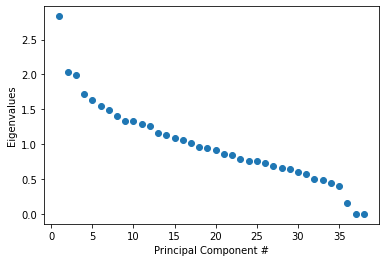

In [52]:
eigenvalues = pca2.explained_variance_
print(len(eigenvalues))
nums = np.arange(1,39)

plt.scatter(nums, eigenvalues)
plt.xlabel('Principal Component #')
plt.ylabel('Eigenvalues')

## 3-D scatterplot of the principal components

<ipython-input-53-ead4bb150b73>:11: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0, 'PC3 - 5.2%')

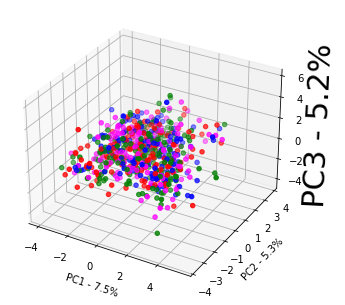

In [53]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization!
fig = plt.figure()
n_samples=649
labels   = [np.random.choice(['A','B','C','D']) for i in range(n_samples)]
label_color_dict = {'A':'red','B':'green','C':'blue','D':'magenta'}

# Color vector creation
cvec = [label_color_dict[label] for label in labels]

ax = Axes3D(fig)





ax.scatter(pca_dframe_lang.PC1, pca_dframe_lang.PC2, pca_dframe_lang.PC3,c=cvec)
plt.xlabel('PC1 - {0}%'.format(per_var3[0]))
plt.ylabel('PC2 - {0}%'.format(per_var3[1]))
ax.set_zlabel('PC3 - {0}%'.format(per_var3[2]), fontsize=30, rotation=60)

## Running PCA with the standardized dataset (Outliers removed)

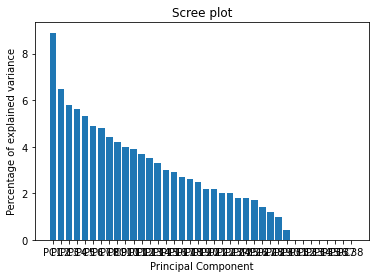

In [54]:
from sklearn.decomposition import PCA
from sklearn import preprocessing 

pca3 = PCA()
pca3.fit(x_normal_nooutliers2)
pca_data3 = pca3.transform(x_normal_nooutliers2)

per_var4 = np.round(pca3.explained_variance_ratio_*100, decimals=1)
label = ['PC' + str(x) for x in range(1, len(per_var4)+1)]

plt.bar(x=range(1, len(per_var4)+1), height=per_var4, tick_label = label)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Principal Component')
plt.title('Scree plot')
plt.show()

38


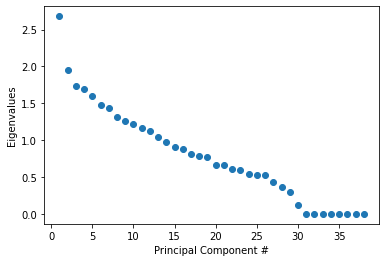

In [55]:
eigenvalues = pca3.explained_variance_
print(len(eigenvalues))
nums = np.arange(1,39)

plt.scatter(nums, eigenvalues)
plt.xlabel('Principal Component #')
plt.ylabel('Eigenvalues')
pca_dframe_lang2 = pd.DataFrame(pca_data3, columns=label)



<ipython-input-56-02a43eac3722>:11: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0, 'PC3 - 5.8%')

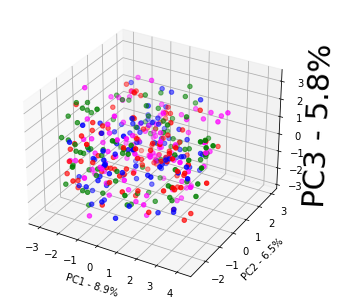

In [56]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization!
fig = plt.figure()
n_samples=393
labels   = [np.random.choice(['A','B','C','D']) for i in range(n_samples)]
label_color_dict = {'A':'red','B':'green','C':'blue','D':'magenta'}

# Color vector creation
cvec = [label_color_dict[label] for label in labels]

ax = Axes3D(fig)





ax.scatter(pca_dframe_lang2.PC1, pca_dframe_lang2.PC2, pca_dframe_lang2.PC3,c=cvec)
plt.xlabel('PC1 - {0}%'.format(per_var4[0]))
plt.ylabel('PC2 - {0}%'.format(per_var4[1]))
ax.set_zlabel('PC3 - {0}%'.format(per_var4[2]), fontsize=30, rotation=60)

## Seeing which features are correlated with the principal components

<ipython-input-57-b6699c272dda>:30: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():




 PCA :

[[ 0.2159946   0.13295917]
 [ 0.24502289  0.01843726]
 [ 0.2952604  -0.03271888]
 [-0.16214376  0.08807099]
 [-0.03824643 -0.04599676]
 [ 0.06038569 -0.1242524 ]
 [ 0.06375652 -0.06318094]
 [ 0.10233892 -0.09647938]
 [-0.02021645 -0.08850786]
 [ 0.33852254 -0.14326961]
 [-0.03688261 -0.1376391 ]
 [-0.27221741  0.07461244]
 [ 0.01903087 -0.00230359]
 [-0.04102837  0.17499575]
 [-0.09235964  0.04099298]
 [-0.10131105 -0.06188722]
 [-0.01472583 -0.02039814]
 [-0.0836876  -0.13958016]
 [-0.07357819 -0.09516366]
 [ 0.11563188  0.05719411]
 [ 0.29136388 -0.1648653 ]
 [-0.14162519 -0.12712547]
 [ 0.08990437  0.44905759]
 [-0.18517646 -0.0925179 ]
 [-0.15866363 -0.26085572]
 [ 0.08937013 -0.15393233]
 [-0.16330587 -0.17333335]
 [ 0.10624549  0.41116221]
 [-0.12518805 -0.22375566]
 [ 0.23452152 -0.17985424]
 [-0.12586114  0.23546757]
 [ 0.07875186 -0.15597831]
 [-0.21277166  0.09461387]
 [-0.03797501 -0.1039049 ]
 [ 0.17657975  0.17975347]
 [ 0.34888653 -0.06908013]
 [ 0.01172518  0.2

<ipython-input-57-b6699c272dda>:30: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


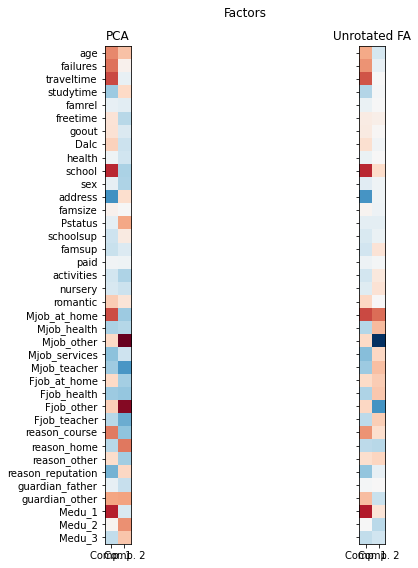

In [57]:
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from statsmodels.multivariate.factor_rotation import rotate_factors


n_comps = 2

feature_names = x_normal2.columns

methods = [
    ("PCA", PCA()),
    ("Unrotated FA", FactorAnalysis())
    
   
]
fig, axes = plt.subplots(ncols=len(methods), figsize=(10, 8))

for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components=n_comps)
    fa.fit(x_normal2)

    components = fa.components_.T
    print("\n\n %s :\n" % method)
    print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
    ax.set_yticks(np.arange(len(feature_names)))
    if ax.is_first_col():
        ax.set_yticklabels(feature_names)
    else:
        ax.set_yticklabels([])
    ax.set_title(str(method))
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Comp. 1", "Comp. 2"])
fig.suptitle("Factors")
plt.tight_layout()
plt.show()

## Trying to do varimax orthogonal rotation on the dataset

In [58]:
fa1 = FactorAnalyzer(n_factors=3, rotation='promax', method='minres')
fa1.fit(x_normal2)
data1 = fa1.transform(x_normal2)

per_var5 = np.round(fa1.get_factor_variance(), decimals=1)
dframe3 = pd.DataFrame(data1, columns = ['PC1', 'PC2', 'PC3'])
# dframe

# dframe.columns

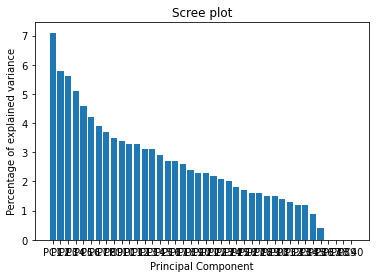

In [59]:

label1 = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label = label1)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Principal Component')
plt.title('Scree plot')
plt.show()

<ipython-input-60-93e5f582fe00>:11: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0, 'PC3 - [0.  0.1 0.1]%')

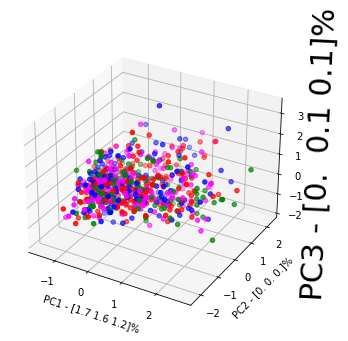

In [60]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization!
fig = plt.figure()
n_samples=649
labels   = [np.random.choice(['A','B','C','D']) for i in range(n_samples)]
label_color_dict = {'A':'red','B':'green','C':'blue','D':'magenta'}

# Color vector creation
cvec = [label_color_dict[label] for label in labels]

ax = Axes3D(fig)





ax.scatter(dframe3.PC1, dframe3.PC2, dframe3.PC3,c=cvec)
plt.xlabel('PC1 - {0}%'.format(per_var5[0]))
plt.ylabel('PC2 - {0}%'.format(per_var5[1]))
ax.set_zlabel('PC3 - {0}%'.format(per_var5[2]), fontsize=30, rotation=60)

## Cross Validating PLS Regression to see number of components for the Language dataset

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:93: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:325: RuntimeWarning: invalid value encountered in true_divide
  x_loadings = np.dot(x_scores, Xk) / np.dot(x_scores, x_scores)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:334: RuntimeWarning: invalid value encountered in true_divide
  y_loadings = np.dot(x_scores, Yk) / np.dot(x_scores, x_scores)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, 

Text(0.5, 1.0, 'hp')

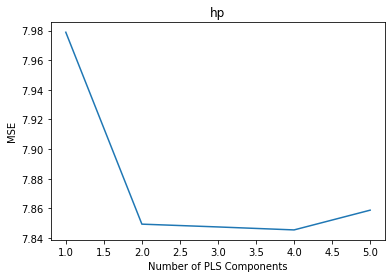

In [61]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.cross_decomposition import PLSRegression
#define cross-validation method

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []
n = len(x_normal2)

# Calculate MSE with only the intercept
score = -1*cross_val_score(PLSRegression(n_components=1),
           np.ones((n,1)), y, cv=cv, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    pls = PLSRegression(n_components=i)
    score = -1*cross_val_score(pls, x_normal2, y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

#plot test MSE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('hp')

# Models, Not using PCA

## N'yoma - Linear Regression & Variants

### Math

In [62]:
# first step splitting the data into training and test, training 80% and the test 20% of the data points
x = data_math.drop(['G1','G2', 'G3','absences'], axis='columns')
# y = data_math[['G1','G2', 'G3']]
y = data_math['G3']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(df.drop(['G1'], axis='columns'), digits.G1, test.size= 0.2)

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

metrics = [
    'neg_root_mean_squared_error',
    'neg_mean_absolute_error',
    'explained_variance'
]


k_folds = 10

cv_results = cross_validate(LinearRegression(), x, y, scoring=metrics, cv=k_folds, n_jobs=-1, verbose=10)
print()
loocv_results = cross_validate(LinearRegression(), x, y, scoring=metrics, cv=len(y), n_jobs=-1, verbose=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    1.3s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.3s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    1.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0240s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0510s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    0.1s


[Parallel(n_jobs=-1)]: Batch computation too fast (0.0560s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 182 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0620s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 311 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 364 out of 395 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 395 out of 395 | elapsed:    0.9s finished


In [64]:
cv = pd.DataFrame(cv_results)
loocv = pd.DataFrame(loocv_results)

cv['test_neg_root_mean_squared_error'] = -cv['test_neg_root_mean_squared_error']
cv['test_neg_mean_absolute_error'] = -cv['test_neg_mean_absolute_error']

loocv['test_neg_root_mean_squared_error'] = -loocv['test_neg_root_mean_squared_error']
loocv['test_neg_mean_absolute_error'] = -loocv['test_neg_mean_absolute_error']

display(cv)
display(loocv)

fit_time  score_time  test_neg_root_mean_squared_error  \
0  0.003001    0.003001                          3.115922   
1  0.004001    0.003000                          3.229329   
2  0.004000    0.003000                          4.005818   
3  0.003999    0.002002                          6.270775   
4  0.003000    0.003001                          4.125012   
5  0.005002    0.002000                          3.048861   
6  0.004002    0.003001                          5.232951   
7  0.004001    0.003001                          4.698734   
8  0.004002    0.003001                          4.936271   
9  0.005001    0.002001                          4.848696   

   test_neg_mean_absolute_error  test_explained_variance  
0                      2.456348                 0.265709  
1                      2.693994                 0.063816  
2                      3.402136                 0.051404  
3                      4.794434                -0.062013  
4                      3.265161                 0.235916  
5                      2.486333                 0.228646  
6                      3.828926                -0.103201  
7                      3.696652                -0.109403  
8                      3.599459                 0.007042  
9                      3.701457                 0.004310

fit_time  score_time  test_neg_root_mean_squared_error  \
0    0.004326    0.002674                          5.304688   
1    0.004002    0.003000                          3.203125   
2    0.003000    0.002001                          4.341049   
3    0.003000    0.003001                          3.502930   
4    0.003000    0.003000                          0.888672   
..        ...         ...                               ...   
390  0.004001    0.003001                          1.241211   
391  0.004002    0.002999                          3.764648   
392  0.004000    0.002000                          2.219238   
393  0.004001    0.001999                          3.942871   
394  0.004000    0.002001                          1.447266   

     test_neg_mean_absolute_error  test_explained_variance  
0                        5.304688                      1.0  
1                        3.203125                      1.0  
2                        4.341049                      1.0  
3                        3.502930                      1.0  
4                        0.888672                      1.0  
..                            ...                      ...  
390                      1.241211                      1.0  
391                      3.764648                      1.0  
392                      2.219238                      1.0  
393                      3.942871                      1.0  
394                      1.447266                      1.0  

[395 rows x 5 columns]

In [65]:
display(cv.mean())
display(loocv.mean())

fit_time                            0.004001
score_time                          0.002701
test_neg_root_mean_squared_error    4.351237
test_neg_mean_absolute_error        3.392490
test_explained_variance             0.058223
dtype: float64

fit_time                            0.004073
score_time                          0.003125
test_neg_root_mean_squared_error    3.306105
test_neg_mean_absolute_error        3.306105
test_explained_variance             1.000000
dtype: float64

In [66]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import RFECV

# k_folds = len(y_train) # LOOCV
k_folds = 20

print('Fitting with Forward Selection...')
forward = SFS(LinearRegression(), direction='forward', scoring='neg_mean_squared_error', cv=k_folds, n_jobs=-1)
forward.fit(X_train,y_train)

print('Fitting with Backward Selection...')
backward = SFS(LinearRegression(), direction='backward', scoring='neg_mean_squared_error', cv=k_folds, n_jobs=-1)
backward.fit(X_train,y_train)

print('Fitting with Recursive Feature Elimination...')
recur_elim = RFECV(LinearRegression(), scoring='neg_mean_squared_error', cv=k_folds, verbose=10, n_jobs=-1)
recur_elim.fit(X_train,y_train)

print('Done!')

Fitting with Forward Selection...
Fitting with Backward Selection...
Fitting with Recursive Feature Elimination...
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator wit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(


In [67]:
from sklearn.metrics import mean_squared_error as MSE

forward_feats = forward.get_feature_names_out()
forward_model = LinearRegression()
forward_model.fit(X_train[forward_feats],y_train)

backward_feats = backward.get_feature_names_out()
backward_model = LinearRegression()
backward_model.fit(X_train[backward_feats],y_train)

recur_elim_feats = recur_elim.get_feature_names_out()
recur_elim_model = LinearRegression()
recur_elim_model.fit(X_train[recur_elim_feats],y_train)

print(f'Forward Selection RMSE: {np.sqrt(MSE(forward_model.predict(X_test[forward_feats]),y_test))}')
print(f'Backward Selection RMSE: {np.sqrt(MSE(backward_model.predict(X_test[backward_feats]),y_test))}')
print(f'Recursive Elimination RMSE: {np.sqrt(MSE(recur_elim_model.predict(X_test[recur_elim_feats]),y_test))}')


Forward Selection RMSE: 4.753239195922586
Backward Selection RMSE: 4.829880974172454
Recursive Elimination RMSE: 4.818524415053692


In [68]:
print(f'Forward: {forward_feats}')
print()
print(f'Backward: {backward_feats}')
print()
print(f'Recursive Elimination: {recur_elim_feats}')

Forward: ['age' 'failures' 'Medu' 'studytime' 'freetime' 'goout' 'Walc' 'health'
 'sex' 'famsize' 'schoolsup' 'famsup' 'activities' 'romantic'
 'Mjob_health' 'Mjob_services' 'Fjob_other' 'Fjob_services' 'reason_home'
 'reason_other']

Backward: ['age' 'failures' 'studytime' 'sex' 'famsize' 'schoolsup' 'romantic'
 'Mjob_health' 'Mjob_services' 'Fjob_health' 'Fjob_other' 'Fjob_services'
 'Fjob_teacher' 'reason_course' 'reason_home' 'reason_other'
 'reason_reputation' 'guardian_father' 'guardian_mother' 'guardian_other']

Recursive Elimination: ['failures' 'Mjob_at_home' 'Mjob_health' 'Fjob_teacher']


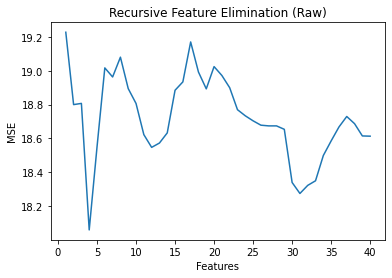

In [69]:
import matplotlib.pyplot as plt

cv_scores = -recur_elim.cv_results_['mean_test_score']
min_feats = recur_elim.min_features_to_select

rfe_fig, rfe_axs = plt.subplots(2,2, sharex=True, sharey='row')
rfe_fig.suptitle('Recursive Feature Elimination', y=1)
rfe_fig.supxlabel('Features')
rfe_fig.supylabel('MSE', x=0)

rfe_axs[0,0].plot(range(min_feats, len(cv_scores)+min_feats), cv_scores, color='tab:blue')
rfe_axs[0,0].set_title('Math')
rfe_axs[0,0].set_ylabel('Raw Data')

plt.close()

plt.plot(range(min_feats, len(cv_scores)+min_feats), cv_scores)
plt.title('Recursive Feature Elimination (Raw)')
plt.ylabel('MSE')
plt.xlabel('Features')
plt.show()

I don't entirely understand why the error goes up sometimes :/

In [70]:
recur_elim.ranking_

array([15,  1, 26, 36, 12,  7, 37, 32, 28, 31, 30, 33,  6,  4,  5, 11, 29,
       13, 17, 27, 34, 35,  8,  1,  1,  2, 18,  3, 16, 24,  9, 22,  1, 20,
       21, 10, 23, 19, 25, 14])

In [71]:
from sklearn.linear_model import RidgeCV, LassoCV

ridge = RidgeCV(scoring='neg_mean_squared_error', store_cv_values=True)
ridge.fit(X_train, y_train)

lasso = LassoCV(cv=len(y_train), n_jobs=-1)
lasso.fit(X_train, y_train)


LassoCV(cv=316, n_jobs=-1)

In [72]:
print(f'Ridge RMSE: {np.sqrt(MSE(ridge.predict(X_test),y_test))}')
print(f'Lasso RMSE: {np.sqrt(MSE(lasso.predict(X_test),y_test))}')

Ridge RMSE: 4.766771517094525
Lasso RMSE: 4.8207379436943425


0.1       1.0       10.0
0    2.058979  2.094124  2.313640
1   -0.083206 -0.091409 -0.158337
2   -0.208646 -0.220926 -0.296670
3    0.536103  0.502927  0.280310
4    3.360708  3.341599  3.135284
..        ...       ...       ...
311  0.950580  0.974043  1.087130
312  2.210282  2.120107  1.452854
313  0.503445  0.530213  0.680668
314  6.028812  5.943942  5.316512
315  0.738010  0.762309  0.930009

[316 rows x 3 columns]

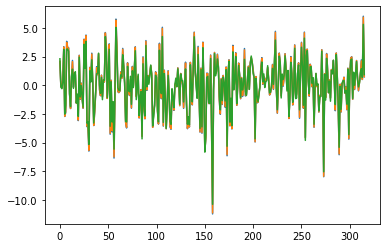

In [73]:
foo = pd.DataFrame(ridge.cv_values_,columns=ridge.alphas)
display(foo)
plt.plot(foo)
plt.show()

I don't understand why some of these are positive and some are negative

In [74]:
from sklearn.linear_model import Ridge

grid_param = {
    'alpha': [1e-3, 1e-2, 1e-1, 1]
}


kf = KFold(n_splits=5)
gs =  GridSearchCV(Ridge(), grid_param, scoring='neg_root_mean_squared_error',  cv=kf, return_train_score=False, n_jobs=-1).fit(X_train, y_train)

# plt.plot(pd.DataFrame(gs.cv_results_))
foo = pd.DataFrame(gs.cv_results_)
bar = -foo['mean_test_score'].rename(foo['param_alpha'])
bar

0.001    4.347991
0.010    4.347828
0.100    4.346204
1.000    4.331195
Name: mean_test_score, dtype: float64

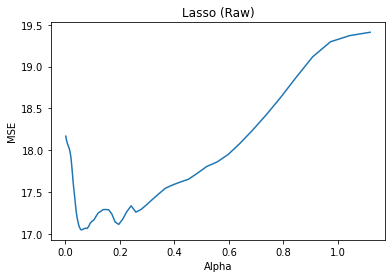

In [75]:
las_fig, las_axs = plt.subplots(2,2, sharex='col', sharey='row')
las_fig.suptitle('Lasso', y=1)
las_fig.supxlabel('Lambda')
las_fig.supylabel('MSE', x=0)

las_axs[0,0].plot(pd.DataFrame(lasso.mse_path_.T, columns=lasso.alphas_).mean(), color='tab:blue')
las_axs[0,0].set_ylabel('Math')
las_axs[0,0].set_title('Raw Data')

plt.close()

plt.plot(pd.DataFrame(lasso.mse_path_.T, columns=lasso.alphas_).mean())
plt.title('Lasso (Raw)')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.show()

In [76]:
lasso_coef = pd.Series(lasso.coef_, index=lasso.feature_names_in_)
print(f'Lasso: {lasso_coef[lasso_coef != 0].index}')

Lasso: Index(['age', 'failures', 'Medu', 'traveltime', 'studytime', 'freetime',
       'goout', 'Walc', 'health', 'school', 'sex', 'address', 'famsize',
       'schoolsup', 'famsup', 'paid', 'romantic', 'Mjob_health',
       'Mjob_services', 'Mjob_teacher', 'Fjob_other', 'reason_course'],
      dtype='object')


### Lang

In [77]:
# first step splitting the data into training and test, training 80% and the test 20% of the data points
x = data_lang.drop(['G1','G2', 'G3','absences'], axis='columns')
# y = data_math[['G1','G2', 'G3']]
y = data_lang['G3']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(df.drop(['G1'], axis='columns'), digits.G1, test.size= 0.2)

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

metrics = [
    'neg_root_mean_squared_error',
    'neg_mean_absolute_error',
    'explained_variance'
]


k_folds = 10

cv_results = cross_validate(LinearRegression(), x, y, scoring=metrics, cv=k_folds, n_jobs=-1, verbose=10)
print()
loocv_results = cross_validate(LinearRegression(), x, y, scoring=metrics, cv=len(y), n_jobs=-1, verbose=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0090s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0220s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0470s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  74 tas

In [79]:
cv = pd.DataFrame(cv_results)
loocv = pd.DataFrame(loocv_results)

cv['test_neg_root_mean_squared_error'] = -cv['test_neg_root_mean_squared_error']
cv['test_neg_mean_absolute_error'] = -cv['test_neg_mean_absolute_error']

loocv['test_neg_root_mean_squared_error'] = -loocv['test_neg_root_mean_squared_error']
loocv['test_neg_mean_absolute_error'] = -loocv['test_neg_mean_absolute_error']

display(cv)
display(loocv)

fit_time  score_time  test_neg_root_mean_squared_error  \
0  0.003002    0.002000                          1.835027   
1  0.002000    0.003001                          2.254633   
2  0.003001    0.003000                          2.623096   
3  0.004001    0.001999                          2.401468   
4  0.004001    0.001999                          2.219771   
5  0.003001    0.001999                          2.590955   
6  0.004001    0.002001                          2.872926   
7  0.003515    0.001486                          2.784314   
8  0.003000    0.002000                          3.221976   
9  0.004001    0.001999                          4.800103   

   test_neg_mean_absolute_error  test_explained_variance  
0                      1.402674                 0.184947  
1                      1.806911                -0.102015  
2                      1.927764                 0.315800  
3                      1.897559                 0.002104  
4                      1.793780                 0.281163  
5                      1.984503                 0.137095  
6                      2.218329                 0.323535  
7                      1.977945                 0.114052  
8                      2.377599                -0.033053  
9                      3.521626                 0.170882

fit_time  score_time  test_neg_root_mean_squared_error  \
0    0.004000    0.002000                          2.119141   
1    0.004002    0.002015                          2.703369   
2    0.004001    0.003001                          1.085449   
3    0.004002    0.002001                          0.159668   
4    0.004002    0.002001                          0.477783   
..        ...         ...                               ...   
644  0.004001    0.002001                          1.683594   
645  0.003000    0.002001                          3.412109   
646  0.004000    0.002007                          2.937500   
647  0.003000    0.002007                          0.072754   
648  0.003594    0.001407                          0.326660   

     test_neg_mean_absolute_error  test_explained_variance  
0                        2.119141                      1.0  
1                        2.703369                      1.0  
2                        1.085449                      1.0  
3                        0.159668                      1.0  
4                        0.477783                      1.0  
..                            ...                      ...  
644                      1.683594                      1.0  
645                      3.412109                      1.0  
646                      2.937500                      1.0  
647                      0.072754                      1.0  
648                      0.326660                      1.0  

[649 rows x 5 columns]

In [80]:
display(cv.mean())
display(loocv.mean())

fit_time                            0.003352
score_time                          0.002149
test_neg_root_mean_squared_error    2.760427
test_neg_mean_absolute_error        2.090869
test_explained_variance             0.139451
dtype: float64

fit_time                            0.003715
score_time                          0.002609
test_neg_root_mean_squared_error    2.020682
test_neg_mean_absolute_error        2.020682
test_explained_variance             1.000000
dtype: float64

In [81]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import RFECV

# k_folds = len(y_train) # LOOCV
k_folds = 20

print('Fitting with Forward Selection...')
forward = SFS(LinearRegression(), direction='forward', scoring='neg_mean_squared_error', cv=k_folds, n_jobs=-1)
forward.fit(X_train,y_train)

print('Fitting with Backward Selection...')
backward = SFS(LinearRegression(), direction='backward', scoring='neg_mean_squared_error', cv=k_folds, n_jobs=-1)
backward.fit(X_train,y_train)

print('Fitting with Recursive Feature Elimination...')
recur_elim = RFECV(LinearRegression(), scoring='neg_mean_squared_error', cv=k_folds, verbose=10, n_jobs=-1)
recur_elim.fit(X_train,y_train)

print('Done!')

Fitting with Forward Selection...
Fitting with Backward Selection...
Fitting with Recursive Feature Elimination...
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Done!


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(


In [82]:
from sklearn.metrics import mean_squared_error as MSE

forward_feats = forward.get_feature_names_out()
forward_model = LinearRegression()
forward_model.fit(X_train[forward_feats],y_train)

backward_feats = backward.get_feature_names_out()
backward_model = LinearRegression()
backward_model.fit(X_train[backward_feats],y_train)

recur_elim_feats = recur_elim.get_feature_names_out()
recur_elim_model = LinearRegression()
recur_elim_model.fit(X_train[recur_elim_feats],y_train)

print(f'Forward Selection RMSE: {np.sqrt(MSE(forward_model.predict(X_test[forward_feats]),y_test))}')
print(f'Backward Selection RMSE: {np.sqrt(MSE(backward_model.predict(X_test[backward_feats]),y_test))}')
print(f'Recursive Elimination RMSE: {np.sqrt(MSE(recur_elim_model.predict(X_test[recur_elim_feats]),y_test))}')


Forward Selection RMSE: 2.422332543305191
Backward Selection RMSE: 2.4325148497529
Recursive Elimination RMSE: 2.40381934645267


In [83]:
print(f'Forward: {forward_feats}')
print()
print(f'Backward: {backward_feats}')
print()
print(f'Recursive Elimination: {recur_elim_feats}')

Forward: ['failures' 'Medu' 'studytime' 'famrel' 'freetime' 'Walc' 'health'
 'school' 'sex' 'address' 'famsize' 'schoolsup' 'activities' 'nursery'
 'romantic' 'Mjob_health' 'Mjob_services' 'Mjob_teacher' 'Fjob_services'
 'guardian_father']

Backward: ['failures' 'studytime' 'Walc' 'health' 'school' 'sex' 'schoolsup'
 'Mjob_at_home' 'Mjob_other' 'Mjob_services' 'Fjob_at_home' 'Fjob_health'
 'Fjob_other' 'Fjob_services' 'Fjob_teacher' 'reason_course'
 'reason_other' 'guardian_father' 'guardian_mother' 'guardian_other']

Recursive Elimination: ['age' 'failures' 'Medu' 'studytime' 'famrel' 'freetime' 'goout' 'Dalc'
 'Walc' 'health' 'school' 'sex' 'address' 'famsize' 'Pstatus' 'schoolsup'
 'paid' 'activities' 'nursery' 'romantic' 'Mjob_at_home' 'Mjob_health'
 'Mjob_other' 'Mjob_services' 'Mjob_teacher' 'Fjob_at_home' 'Fjob_health'
 'Fjob_other' 'Fjob_services' 'Fjob_teacher' 'reason_course' 'reason_home'
 'reason_other' 'reason_reputation' 'guardian_father' 'guardian_mother'
 'guardian_othe

Text(0.5, 0, 'Features')

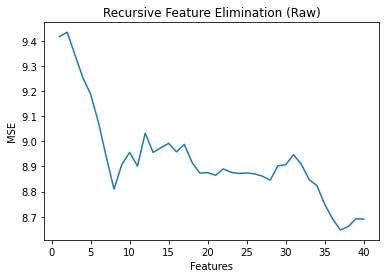

In [84]:
import matplotlib.pyplot as plt

cv_scores = -recur_elim.cv_results_['mean_test_score']
min_feats = recur_elim.min_features_to_select

rfe_axs[1,0].plot(range(min_feats, len(cv_scores)+min_feats), cv_scores, color='tab:blue')
rfe_axs[1,0].set_ylabel('Language')

plt.close()

plt.plot(range(min_feats, len(cv_scores)+min_feats), cv_scores)
plt.title('Recursive Feature Elimination (Raw)')
plt.ylabel('MSE')
plt.xlabel('Features')

I don't entirely understand why the error goes up sometimes :/

In [85]:
recur_elim.ranking_

array([1, 1, 1, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [86]:
from sklearn.linear_model import RidgeCV, LassoCV

ridge = RidgeCV(scoring='neg_mean_squared_error', store_cv_values=True)
ridge.fit(X_train, y_train)

lasso = LassoCV(cv=len(y_train), n_jobs=-1)
lasso.fit(X_train, y_train)


LassoCV(cv=519, n_jobs=-1)

In [87]:
print(f'Ridge RMSE: {np.sqrt(MSE(ridge.predict(X_test),y_test))}')
print(f'Lasso RMSE: {np.sqrt(MSE(lasso.predict(X_test),y_test))}')

Ridge RMSE: 2.3910485072320595
Lasso RMSE: 2.3870412817684312


0.1       1.0       10.0
0    0.439042  0.442095  0.461053
1   -2.671839 -2.677556 -2.706470
2    0.219387  0.229445  0.309932
3    1.767130  1.754509  1.648472
4    0.277652  0.286317  0.366709
..        ...       ...       ...
514  0.868760  0.871882  0.902073
515  0.473178  0.471439  0.451099
516 -0.985096 -0.976565 -0.905796
517 -0.858202 -0.865217 -0.923110
518 -5.131771 -5.085131 -4.704149

[519 rows x 3 columns]

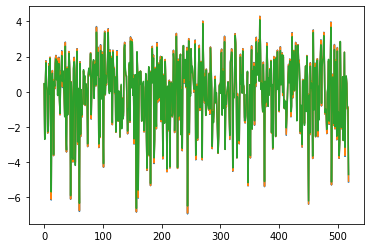

In [88]:
foo = pd.DataFrame(ridge.cv_values_,columns=ridge.alphas)
display(foo)
plt.plot(foo)
plt.show()

I don't understand why some of these are positive and some are negative

In [89]:
from sklearn.linear_model import Ridge

grid_param = {
    'alpha': [1e-3, 1e-2, 1e-1, 1]
}


kf = KFold(n_splits=5)
gs =  GridSearchCV(Ridge(), grid_param, scoring='neg_root_mean_squared_error',  cv=kf, return_train_score=False, n_jobs=-1).fit(X_train, y_train)

# plt.plot(pd.DataFrame(gs.cv_results_))
foo = pd.DataFrame(gs.cv_results_)
bar = -foo['mean_test_score'].rename(foo['param_alpha'])
bar

0.001    2.982063
0.010    2.982005
0.100    2.981427
1.000    2.975943
Name: mean_test_score, dtype: float64

Text(0, 0.5, 'MSE')

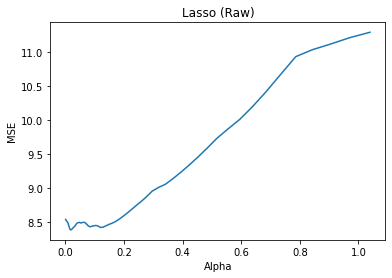

In [90]:
las_axs[1,0].plot(pd.DataFrame(lasso.mse_path_.T, columns=lasso.alphas_).mean(), color='tab:blue')
las_axs[1,0].set_ylabel('Language')

plt.close()

plt.plot(pd.DataFrame(lasso.mse_path_.T, columns=lasso.alphas_).mean())
plt.title('Lasso (Raw)')
plt.xlabel('Alpha')
plt.ylabel('MSE')

In [91]:
lasso_coef = pd.Series(lasso.coef_, index=lasso.feature_names_in_)
print(f'Lasso: {lasso_coef[lasso_coef != 0].index}')

Lasso: Index(['age', 'failures', 'Medu', 'studytime', 'famrel', 'freetime', 'goout',
       'Dalc', 'Walc', 'health', 'school', 'sex', 'address', 'famsize',
       'schoolsup', 'activities', 'nursery', 'romantic', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_teacher', 'Fjob_services',
       'Fjob_teacher', 'reason_other', 'reason_reputation', 'guardian_father'],
      dtype='object')


## Mahvash-Random Forest regression for Math and Language data sets

In [92]:
# random forest for math data

# first step splitting the data into training and test, training 80% and the test 20% of the data points
x = data_math.drop(['G1','G2', 'G3','absences'], axis='columns')
# y = data_math[['G1','G2', 'G3']]
y = data_math['G3']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

In [93]:
# from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate, KFold
# from sklearn.multioutput import MultiOutputClassifier
# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multiclass import OneVsRestClassifier
# from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, make_scorer, precision_score
from sklearn.metrics import mean_squared_error as mse


In [94]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# # Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'n_estimators':n_estimators,
    'max_features':max_features,
    'min_samples_leaf':min_samples_leaf,
    'bootstrap':bootstrap               
}

kf = KFold(n_splits=5)
search = RandomizedSearchCV(RandomForestRegressor(), random_grid, n_iter = 50, scoring='neg_mean_squared_error',  cv=kf, return_train_score=False, n_jobs=-1, verbose=4).fit(X_train, y_train)

display(pd.DataFrame(search.cv_results_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        2.606718      0.192586         0.113156        0.009762   
1        3.258988      0.132941         0.149863        0.005723   
2        3.310910      0.100222         0.138854        0.017003   
3        1.769720      0.099801         0.140685        0.009150   
4        1.030445      0.110800         0.040035        0.002202   
5        1.602540      0.126261         0.077050        0.009641   
6        0.976065      0.097227         0.056928        0.003042   
7        0.224700      0.010052         0.020609        0.001068   
8        1.011421      0.057172         0.068456        0.016668   
9        0.633314      0.036103         0.043128        0.005628   
10       0.876704      0.022573         0.077629        0.004418   
11       1.773756      0.074328         0.112555        0.009547   
12       1.643704      0.105767         0.130939        0.005936   
13       0.760450      0.061644         0.059748        0.005040   
14       1.682096      0.102283         0.072844        0.005030   
15       1.722096      0.014681         0.077013        0.004004   
16       1.748608      0.167179         0.079953        0.014461   
17       2.176195      0.050845         0.186479        0.008821   
18       1.965164      0.098117         0.142981        0.010157   
19       1.613761      0.131742         0.106163        0.012435   
20       2.940720      0.138209         0.191425        0.016964   
21       0.334329      0.007977         0.023856        0.001128   
22       3.437588      0.262572         0.139877        0.024765   
23       0.682952      0.055975         0.061481        0.009277   
24       1.207896      0.016426         0.098434        0.001528   
25       2.591803      0.204992         0.204436        0.021443   
26       1.303848      0.127909         0.098597        0.002484   
27       4.886328      0.406873         0.207199        0.030896   
28       0.429808      0.032740         0.020968        0.003390   
29       1.364036      0.133081         0.124074        0.020554   
30       4.521566      0.331067         0.200216        0.012409   
31       0.582177      0.056289         0.038221        0.002611   
32       1.849843      0.102688         0.106688        0.002730   
33       2.708433      0.187073         0.162681        0.006364   
34       0.862652      0.079611         0.038717        0.001529   
35       5.276695      0.481844         0.180955        0.015358   
36       0.842046      0.035973         0.061918        0.004750   
37       1.501691      0.084827         0.108394        0.024490   
38       0.223050      0.019655         0.019809        0.000514   
39       2.794167      0.195868         0.122744        0.006308   
40       2.714529      0.340420         0.117240        0.013679   
41       1.580458      0.047703         0.070543        0.002556   
42       2.793146      0.170276         0.130904        0.008565   
43       1.648093      0.174439         0.078523        0.011105   
44       2.235708      0.166795         0.198252        0.024647   
45       2.137342      0.044573         0.137241        0.015814   
46       0.342704      0.022205         0.022611        0.003260   
47       1.812901      0.057764         0.088291        0.006903   
48       1.745051      0.029368         0.093143        0.002768   
49       0.483870      0.053103         0.036322        0.001681   

   param_n_estimators param_min_samples_split param_min_samples_leaf  \
0                1200                       2                      4   
1                1600                       5                      4   
2                1400                       2                      2   
3                1400                       5                      1   
4                 400                       5                      1   
5                 800                       5                      4   
6                 600          

In [95]:
rf = RandomForestRegressor(**search.best_params_)
rf.fit(X_train, y_train)

# evaluating the test RMSE
display(np.sqrt(mse(y_test, rf.predict(X_test))))

5.002465228107517

In [96]:
len(rf.estimators_)

400

In [97]:
# evaluating the model
rf.score(X_test, y_test)

0.09294297420793651

In [98]:
# if we need this to plot anything
y_predicted = rf.predict(X_test)

In [99]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

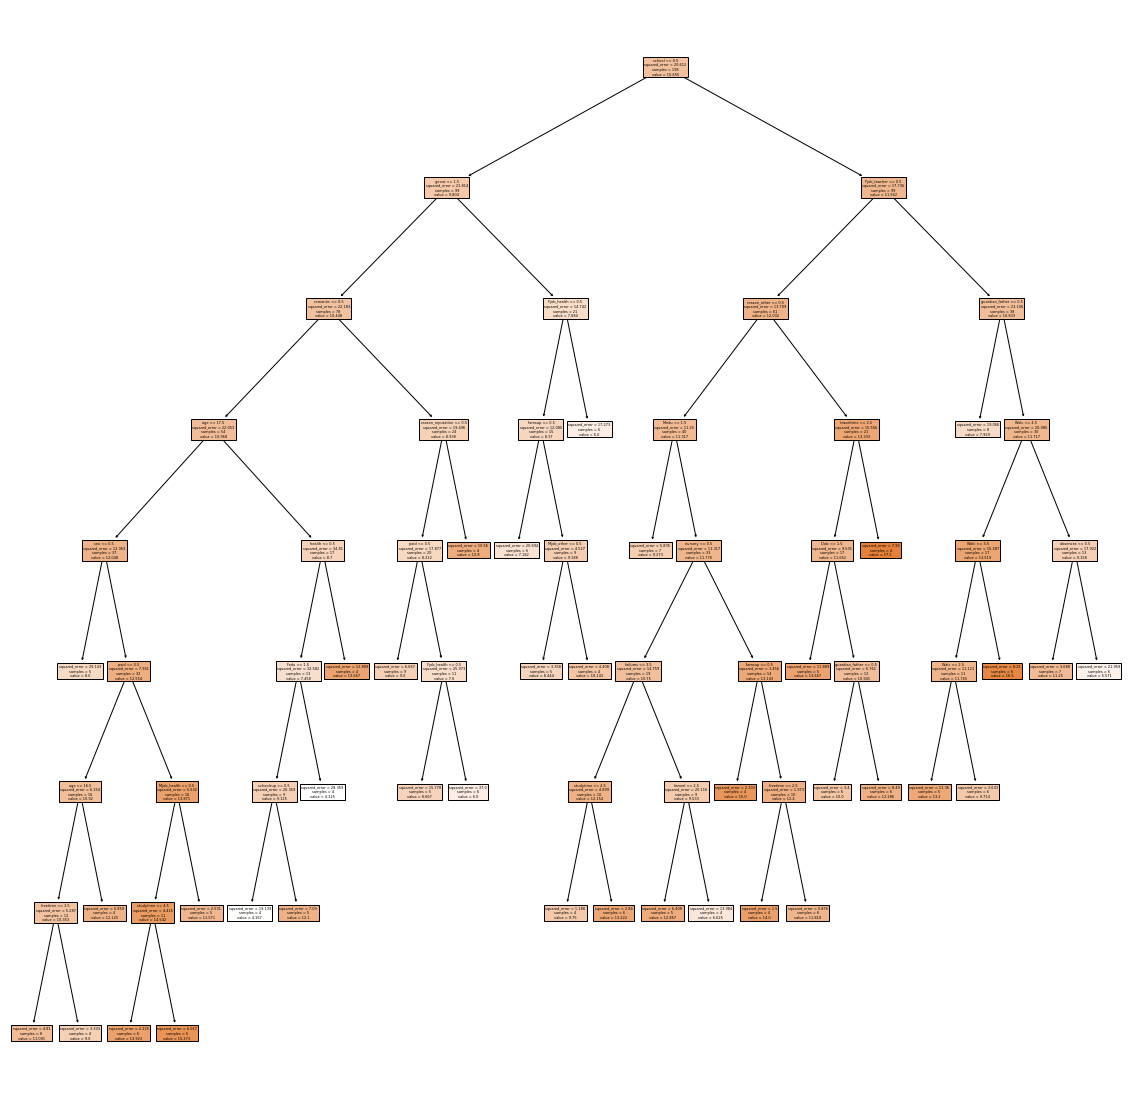

In [100]:
from sklearn import tree

fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf.estimators_[0], feature_names=data_math.columns, filled=True)
fig.savefig('original_tree.png')

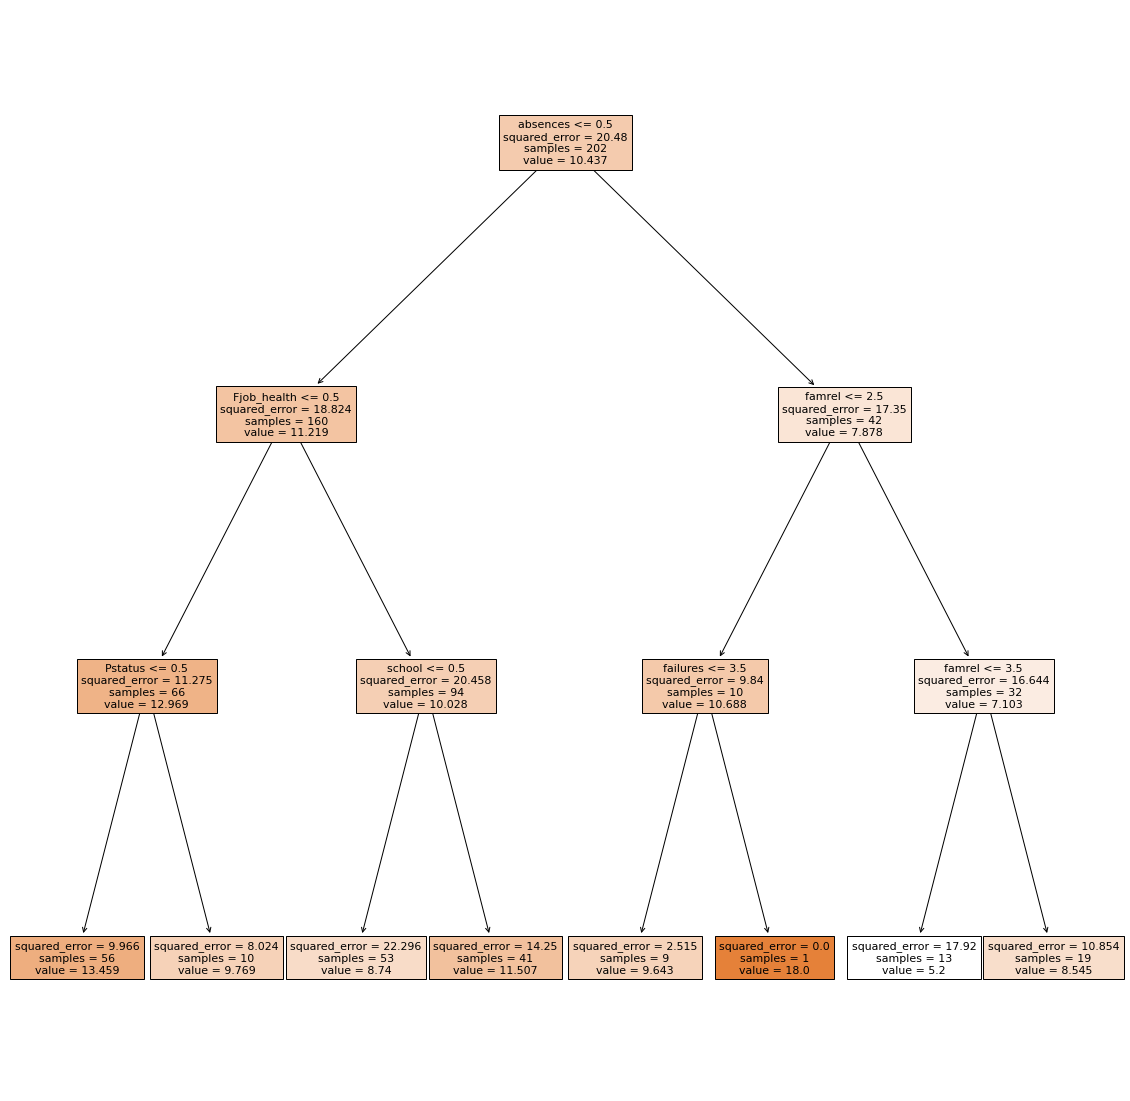

In [101]:
# pruning the tree to max depth of 3 just for visualization purposes
rf = RandomForestRegressor(n_estimators=100, max_depth=3)
rf.fit(X_train, y_train)
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf.estimators_[0], feature_names=data_math.columns, filled=True)
fig.savefig('Pruned_tree.png')

In [102]:
import pandas as pd

from sklearn import tree
from dtreeviz.trees import dtreeviz
from matplotlib import pyplot as plt

In [103]:
viz = dtreeviz(rf.estimators_[0], X_train, y_train, feature_names=data_math.columns, target_name="Target")
viz
viz.save("decision_tree_house.svg")

### Lang

In [104]:
# random forest for language data

# first step splitting the data into training and test, training 80% and the test 20% of the data points
x = data_lang.drop(['G1','G2', 'G3','absences'], axis='columns')
# y = data_math[['G1','G2', 'G3']]
y = data_lang['G3']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

In [105]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# # Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'n_estimators':n_estimators,
    'max_features':max_features,
    'min_samples_leaf':min_samples_leaf,
    'bootstrap':bootstrap               
}

kf = KFold(n_splits=5)
search = RandomizedSearchCV(RandomForestRegressor(), random_grid, n_iter = 50, scoring='neg_mean_squared_error',  cv=kf, return_train_score=False, n_jobs=-1, verbose=4).fit(X_train, y_train)

display(pd.DataFrame(search.cv_results_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        6.395184      0.211473         0.185984        0.003299   
1        4.841151      0.170039         0.205377        0.017903   
2        3.918040      0.162418         0.104943        0.009070   
3        0.327017      0.022268         0.022445        0.002250   
4        0.274142      0.018738         0.022622        0.002641   
5        2.399323      0.179418         0.078652        0.008464   
6        5.497583      0.278396         0.177450        0.008944   
7        1.030513      0.056492         0.067638        0.002319   
8        0.622107      0.077158         0.020563        0.001914   
9        3.102035      0.176323         0.197164        0.013944   
10       4.492301      0.338169         0.129804        0.014442   
11       0.582426      0.031761         0.020656        0.000999   
12       4.472160      0.321406         0.146204        0.018660   
13       1.257739      0.088026         0.077750        0.006002   
14       1.396914      0.046443         0.099646        0.007823   
15       1.706587      0.117065         0.071784        0.011516   
16       4.806379      0.143586         0.160356        0.003656   
17       0.255430      0.021257         0.021644        0.003311   
18       2.599626      0.168195         0.107653        0.017577   
19       3.316502      0.351862         0.128866        0.016448   
20       0.492863      0.015694         0.045284        0.013675   
21       2.269477      0.204550         0.133166        0.009806   
22       4.975472      0.223323         0.135162        0.004958   
23       3.420770      0.276014         0.088600        0.013927   
24       5.748387      0.458333         0.186022        0.005705   
25       2.710677      0.132682         0.199687        0.015091   
26       0.506240      0.032282         0.041822        0.006759   
27       5.908746      0.341006         0.198697        0.015000   
28       0.849051      0.051969         0.058721        0.003081   
29       0.636420      0.046417         0.028713        0.013696   
30       8.203532      0.272772         0.225986        0.020998   
31       1.972026      0.147235         0.075501        0.006287   
32       2.135194      0.100283         0.143576        0.015970   
33       6.106653      0.136816         0.197778        0.023071   
34       0.539712      0.038471         0.044633        0.006989   
35       2.995489      0.213855         0.216117        0.020422   
36       2.272226      0.036795         0.075422        0.005535   
37       0.793504      0.073440         0.062927        0.007113   
38       0.324435      0.029855         0.020706        0.002683   
39       3.357990      0.160296         0.107282        0.012081   
40       6.761038      0.559949         0.181392        0.013187   
41       3.396125      0.253462         0.213066        0.020697   
42       0.816501      0.018851         0.062023        0.003471   
43       3.272740      0.055856         0.221754        0.024358   
44       0.602431      0.013384         0.020805        0.000400   
45       1.745803      0.192088         0.059535        0.008839   
46       2.252307      0.070516         0.169097        0.015000   
47       1.644451      0.142452         0.120951        0.009363   
48       3.723605      0.158525         0.084296        0.004046   
49       2.207901      0.095371         0.149834        0.008378   

   param_n_estimators param_min_samples_split param_min_samples_leaf  \
0                2000                      10                      2   
1                1800                      10                      4   
2                1000                       5                      1   
3                 200                      10                      2   
4                 200                       5                      2   
5                 800                       5                      4   
6                1800          

In [106]:
rf = RandomForestRegressor(**search.best_params_)
rf.fit(X_train, y_train)

# evaluating the test RMSE
display(np.sqrt(mse(y_test, rf.predict(X_test))))

2.357333468571083

In [107]:
# stuff!!
RandomForestRegressor().get_params().keys()
# evaluating the model
rf.score(X_test, y_test)
# if we need this to plot anything
y_predicted = rf.predict(X_test)

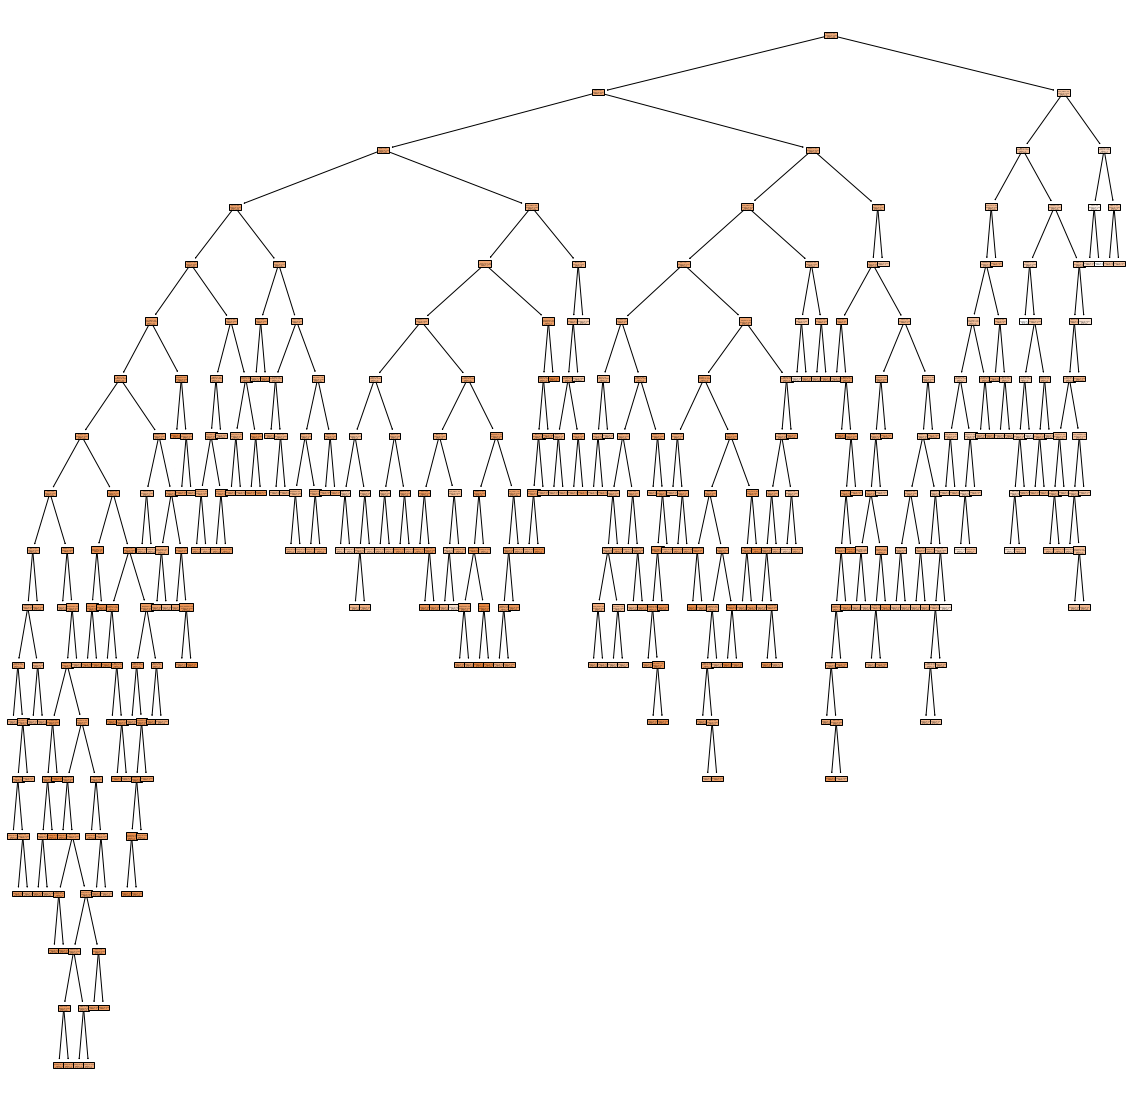

In [108]:
# visualizations 1
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf.estimators_[0], feature_names=data_lang.columns, filled=True)
fig.savefig('original_tree_lang.png')

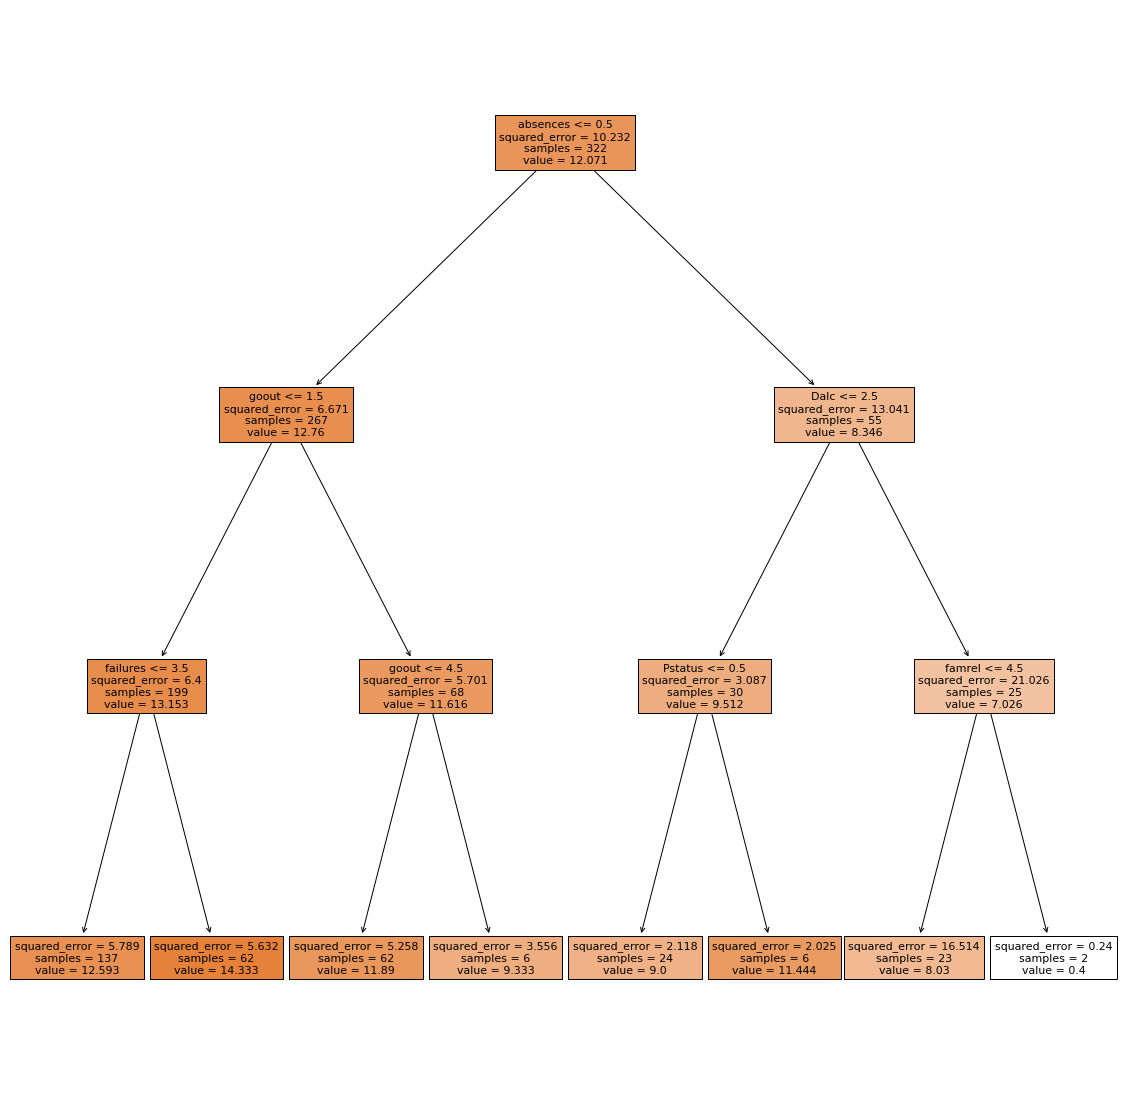

In [109]:
#visualization 2, pruning the tree
rf = RandomForestRegressor(n_estimators=100, max_depth=3)
rf.fit(X_train, y_train)
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf.estimators_[0], feature_names=data_math.columns, filled=True)
fig.savefig('Pruned_tree_lang.png')

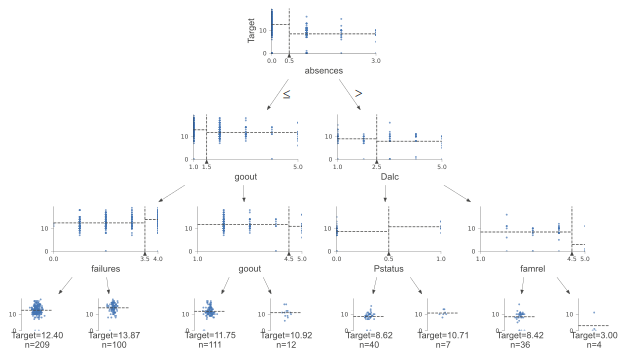

In [110]:
#visualization 3
viz = dtreeviz(rf.estimators_[0], X_train, y_train, feature_names=data_math.columns, target_name="Target")
viz

In [111]:
viz.save("decision_tree_house.svg")

# Models, Using PCA/PLS

## Linear Regressions

### Math

In [112]:
X_train, X_test, y_train, y_test = train_test_split(pca_df, data_math['G3'], test_size=0.2,random_state=0)

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

metrics = [
    'neg_root_mean_squared_error',
    'neg_mean_absolute_error',
    'explained_variance'
]


k_folds = 10

cv_results = cross_validate(LinearRegression(), x, y, scoring=metrics, cv=k_folds, n_jobs=-1, verbose=10)
print()
loocv_results = cross_validate(LinearRegression(), x, y, scoring=metrics, cv=len(y), n_jobs=-1, verbose=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0110s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0150s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0510s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  74 tas

[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0969s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 447 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 466 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 520 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 541 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 562 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 585 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 608 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 649 out of 649 | elapsed:    0.4s finished


In [114]:
cv = pd.DataFrame(cv_results)
loocv = pd.DataFrame(loocv_results)

cv['test_neg_root_mean_squared_error'] = -cv['test_neg_root_mean_squared_error']
cv['test_neg_mean_absolute_error'] = -cv['test_neg_mean_absolute_error']

loocv['test_neg_root_mean_squared_error'] = -loocv['test_neg_root_mean_squared_error']
loocv['test_neg_mean_absolute_error'] = -loocv['test_neg_mean_absolute_error']

display(cv)
display(loocv)

fit_time  score_time  test_neg_root_mean_squared_error  \
0  0.004009    0.001993                          1.835027   
1  0.004003    0.003001                          2.254633   
2  0.004002    0.002002                          2.623096   
3  0.004002    0.003000                          2.401468   
4  0.004002    0.003001                          2.219771   
5  0.003994    0.002999                          2.590955   
6  0.004000    0.003001                          2.872926   
7  0.004002    0.003000                          2.784314   
8  0.004000    0.002002                          3.221976   
9  0.004000    0.002767                          4.800103   

   test_neg_mean_absolute_error  test_explained_variance  
0                      1.402674                 0.184947  
1                      1.806911                -0.102015  
2                      1.927764                 0.315800  
3                      1.897559                 0.002104  
4                      1.793780                 0.281163  
5                      1.984503                 0.137095  
6                      2.218329                 0.323535  
7                      1.977945                 0.114052  
8                      2.377599                -0.033053  
9                      3.521626                 0.170882

fit_time  score_time  test_neg_root_mean_squared_error  \
0    0.004003    0.002000                          2.119141   
1    0.003002    0.002000                          2.703369   
2    0.003002    0.002000                          1.085449   
3    0.003001    0.003000                          0.159668   
4    0.002489    0.003000                          0.477783   
..        ...         ...                               ...   
644  0.002000    0.002002                          1.683594   
645  0.003001    0.002000                          3.412109   
646  0.004000    0.001002                          2.937500   
647  0.003000    0.002000                          0.072754   
648  0.003002    0.001999                          0.326660   

     test_neg_mean_absolute_error  test_explained_variance  
0                        2.119141                      1.0  
1                        2.703369                      1.0  
2                        1.085449                      1.0  
3                        0.159668                      1.0  
4                        0.477783                      1.0  
..                            ...                      ...  
644                      1.683594                      1.0  
645                      3.412109                      1.0  
646                      2.937500                      1.0  
647                      0.072754                      1.0  
648                      0.326660                      1.0  

[649 rows x 5 columns]

In [115]:
display(cv.mean())
display(loocv.mean())

fit_time                            0.004002
score_time                          0.002677
test_neg_root_mean_squared_error    2.760427
test_neg_mean_absolute_error        2.090869
test_explained_variance             0.139451
dtype: float64

fit_time                            0.003580
score_time                          0.002483
test_neg_root_mean_squared_error    2.020682
test_neg_mean_absolute_error        2.020682
test_explained_variance             1.000000
dtype: float64

In [116]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import RFECV

# k_folds = len(y_train) # LOOCV
k_folds = 20

print('Fitting with Forward Selection...')
forward = SFS(LinearRegression(), direction='forward', scoring='neg_mean_squared_error', cv=k_folds, n_jobs=-1)
forward.fit(X_train,y_train)

print('Fitting with Backward Selection...')
backward = SFS(LinearRegression(), direction='backward', scoring='neg_mean_squared_error', cv=k_folds, n_jobs=-1)
backward.fit(X_train,y_train)

print('Fitting with Recursive Feature Elimination...')
recur_elim = RFECV(LinearRegression(), scoring='neg_mean_squared_error', cv=k_folds, verbose=10, n_jobs=-1)
recur_elim.fit(X_train,y_train)

print('Done!')

Fitting with Forward Selection...
Fitting with Backward Selection...
Fitting with Recursive Feature Elimination...
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator wit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(


In [117]:
X_train.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19',
       'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28',
       'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37',
       'PC38', 'PC39', 'PC40'],
      dtype='object')

In [118]:
from sklearn.metrics import mean_squared_error as MSE

forward_feats = forward.get_feature_names_out()
forward_model = LinearRegression()
forward_model.fit(X_train[forward_feats],y_train)

backward_feats = backward.get_feature_names_out()
backward_model = LinearRegression()
backward_model.fit(X_train[backward_feats],y_train)

recur_elim_feats = recur_elim.get_feature_names_out()
recur_elim_model = LinearRegression()
recur_elim_model.fit(X_train[recur_elim_feats],y_train)

print(f'Forward Selection RMSE: {np.sqrt(MSE(forward_model.predict(X_test[forward_feats]),y_test))}')
print(f'Backward Selection RMSE: {np.sqrt(MSE(backward_model.predict(X_test[backward_feats]),y_test))}')
print(f'Recursive Elimination RMSE: {np.sqrt(MSE(recur_elim_model.predict(X_test[recur_elim_feats]),y_test))}')


Forward Selection RMSE: 4.790500469884813
Backward Selection RMSE: 4.7524471041964995
Recursive Elimination RMSE: 4.821231425586908


In [119]:
print(f'Forward: {forward_feats}')
print()
print(f'Backward: {backward_feats}')
print()
print(f'Recursive Elimination: {recur_elim_feats}')

Forward: ['PC1' 'PC2' 'PC5' 'PC6' 'PC8' 'PC9' 'PC10' 'PC11' 'PC12' 'PC13' 'PC14'
 'PC15' 'PC17' 'PC24' 'PC25' 'PC28' 'PC29' 'PC30' 'PC35' 'PC36']

Backward: ['PC1' 'PC2' 'PC6' 'PC8' 'PC9' 'PC10' 'PC12' 'PC13' 'PC15' 'PC16' 'PC17'
 'PC24' 'PC28' 'PC29' 'PC30' 'PC31' 'PC32' 'PC33' 'PC36' 'PC38']

Recursive Elimination: ['PC1' 'PC17' 'PC29' 'PC36' 'PC37' 'PC38' 'PC39' 'PC40']


Text(0.5, 0, 'Features')

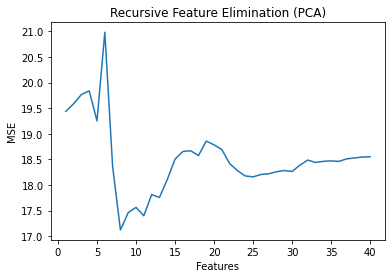

In [120]:
import matplotlib.pyplot as plt

cv_scores = -recur_elim.cv_results_['mean_test_score']
min_feats = recur_elim.min_features_to_select

rfe_axs[0,1].plot(range(min_feats, len(cv_scores)+min_feats), cv_scores, color='tab:blue')
rfe_axs[0,1].set_title('PCA Data')

plt.close()

plt.plot(range(min_feats, len(cv_scores)+min_feats), cv_scores)
plt.title('Recursive Feature Elimination (PCA)')
plt.ylabel('MSE')
plt.xlabel('Features')

I don't entirely understand why the error goes up sometimes :/

In [121]:
recur_elim.ranking_

array([ 1, 15, 14, 33, 25,  6, 30, 16, 12, 13,  7,  4,  8, 23, 27, 26,  1,
       11, 32,  9, 31, 19, 22,  2, 10, 28, 24, 17,  1,  3, 21, 18, 20, 29,
        5,  1,  1,  1,  1,  1])

In [122]:
from sklearn.linear_model import RidgeCV, LassoCV

ridge = RidgeCV(scoring='neg_mean_squared_error', store_cv_values=True)
ridge.fit(X_train, y_train)

lasso = LassoCV(cv=len(y_train), n_jobs=-1)
lasso.fit(X_train, y_train)


LassoCV(cv=316, n_jobs=-1)

In [123]:
print(f'Ridge RMSE: {np.sqrt(MSE(ridge.predict(X_test),y_test))}')
print(f'Lasso RMSE: {np.sqrt(MSE(lasso.predict(X_test),y_test))}')

Ridge RMSE: 4.775566163820081
Lasso RMSE: 4.903917953724995


0.1       1.0       10.0
0    2.272176  2.253297  2.094304
1    0.000822  0.010359  0.090809
2   -0.701314 -0.695305 -0.639155
3    0.185969  0.186020  0.183387
4    3.610022  3.599120  3.495077
..        ...       ...       ...
311  0.478185  0.477490  0.470856
312  2.167851  2.147964  1.958851
313  0.427152  0.425976  0.420255
314  6.388461  6.369080  6.180753
315  0.769076  0.772255  0.802928

[316 rows x 3 columns]

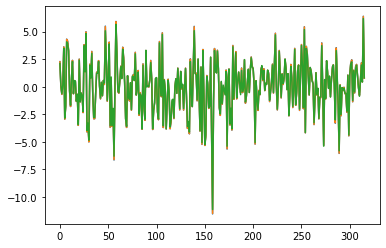

In [124]:
foo = pd.DataFrame(ridge.cv_values_,columns=ridge.alphas)
display(foo)
plt.plot(foo)
plt.show()

I don't understand why some of these are positive and some are negative

In [125]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, GridSearchCV

grid_param = {
    'alpha': [1e-3, 1e-2, 1e-1, 1]
}


kf = KFold(n_splits=5)
gs =  GridSearchCV(Ridge(), grid_param, scoring='neg_root_mean_squared_error',  cv=kf, return_train_score=False, n_jobs=-1).fit(X_train, y_train)

# plt.plot(pd.DataFrame(gs.cv_results_))
foo = pd.DataFrame(gs.cv_results_)
bar = -foo['mean_test_score'].rename(foo['param_alpha'])
bar

0.001    4.323440
0.010    4.323409
0.100    4.323104
1.000    4.320100
Name: mean_test_score, dtype: float64

Text(0, 0.5, 'MSE')

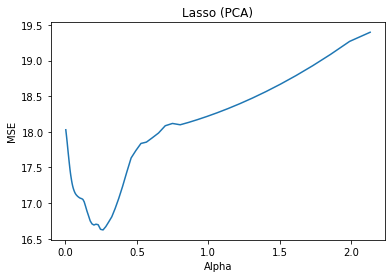

In [126]:
las_axs[0,1].plot(pd.DataFrame(lasso.mse_path_.T, columns=lasso.alphas_).mean(), color='tab:blue')
las_axs[0,1].set_title('PCA Data')

plt.close()

plt.plot(pd.DataFrame(lasso.mse_path_.T, columns=lasso.alphas_).mean())
plt.title('Lasso (PCA)')
plt.xlabel('Alpha')
plt.ylabel('MSE')

In [127]:
lasso_coef = pd.Series(lasso.coef_, index=lasso.feature_names_in_)
print(f'Lasso: {lasso_coef[lasso_coef != 0].index}')

Lasso: Index(['PC1', 'PC2', 'PC3', 'PC6', 'PC8', 'PC9', 'PC12', 'PC13', 'PC17',
       'PC24', 'PC29'],
      dtype='object')


## Language

In [128]:
X_train, X_test, y_train, y_test = train_test_split(pca_dframe_lang, data_lang['G3'], test_size=0.2,random_state=0)

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

metrics = [
    'neg_root_mean_squared_error',
    'neg_mean_absolute_error',
    'explained_variance'
]


k_folds = 10

cv_results = cross_validate(LinearRegression(), x, y, scoring=metrics, cv=k_folds, n_jobs=-1, verbose=10)
print()
loocv_results = cross_validate(LinearRegression(), x, y, scoring=metrics, cv=len(y), n_jobs=-1, verbose=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0090s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0160s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0675s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  74 tas

In [130]:
cv = pd.DataFrame(cv_results)
loocv = pd.DataFrame(loocv_results)

cv['test_neg_root_mean_squared_error'] = -cv['test_neg_root_mean_squared_error']
cv['test_neg_mean_absolute_error'] = -cv['test_neg_mean_absolute_error']

loocv['test_neg_root_mean_squared_error'] = -loocv['test_neg_root_mean_squared_error']
loocv['test_neg_mean_absolute_error'] = -loocv['test_neg_mean_absolute_error']

display(cv)
display(loocv)

fit_time  score_time  test_neg_root_mean_squared_error  \
0  0.003002    0.002001                          1.835027   
1  0.003003    0.002000                          2.254633   
2  0.004003    0.001999                          2.623096   
3  0.003003    0.002999                          2.401468   
4  0.004003    0.002000                          2.219771   
5  0.003000    0.002000                          2.590955   
6  0.003999    0.002002                          2.872926   
7  0.003999    0.003001                          2.784314   
8  0.004000    0.002001                          3.221976   
9  0.002999    0.003001                          4.800103   

   test_neg_mean_absolute_error  test_explained_variance  
0                      1.402674                 0.184947  
1                      1.806911                -0.102015  
2                      1.927764                 0.315800  
3                      1.897559                 0.002104  
4                      1.793780                 0.281163  
5                      1.984503                 0.137095  
6                      2.218329                 0.323535  
7                      1.977945                 0.114052  
8                      2.377599                -0.033053  
9                      3.521626                 0.170882

fit_time  score_time  test_neg_root_mean_squared_error  \
0    0.003001    0.003000                          2.119141   
1    0.004002    0.001999                          2.703369   
2    0.003002    0.003000                          1.085449   
3    0.004001    0.003000                          0.159668   
4    0.003001    0.003000                          0.477783   
..        ...         ...                               ...   
644  0.003001    0.002000                          1.683594   
645  0.004001    0.001000                          3.412109   
646  0.003001    0.001000                          2.937500   
647  0.003000    0.001000                          0.072754   
648  0.002521    0.001001                          0.326660   

     test_neg_mean_absolute_error  test_explained_variance  
0                        2.119141                      1.0  
1                        2.703369                      1.0  
2                        1.085449                      1.0  
3                        0.159668                      1.0  
4                        0.477783                      1.0  
..                            ...                      ...  
644                      1.683594                      1.0  
645                      3.412109                      1.0  
646                      2.937500                      1.0  
647                      0.072754                      1.0  
648                      0.326660                      1.0  

[649 rows x 5 columns]

In [131]:
display(cv.mean())
display(loocv.mean())

fit_time                            0.003501
score_time                          0.002300
test_neg_root_mean_squared_error    2.760427
test_neg_mean_absolute_error        2.090869
test_explained_variance             0.139451
dtype: float64

fit_time                            0.003692
score_time                          0.002511
test_neg_root_mean_squared_error    2.020682
test_neg_mean_absolute_error        2.020682
test_explained_variance             1.000000
dtype: float64

In [132]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import RFECV

# k_folds = len(y_train) # LOOCV
k_folds = 20

print('Fitting with Forward Selection...')
forward = SFS(LinearRegression(), direction='forward', scoring='neg_mean_squared_error', cv=k_folds, n_jobs=-1)
forward.fit(X_train,y_train)

print('Fitting with Backward Selection...')
backward = SFS(LinearRegression(), direction='backward', scoring='neg_mean_squared_error', cv=k_folds, n_jobs=-1)
backward.fit(X_train,y_train)

print('Fitting with Recursive Feature Elimination...')
recur_elim = RFECV(LinearRegression(), scoring='neg_mean_squared_error', cv=k_folds, verbose=10, n_jobs=-1)
recur_elim.fit(X_train,y_train)

print('Done!')

Fitting with Forward Selection...
Fitting with Backward Selection...
Fitting with Recursive Feature Elimination...
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator wit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(


In [133]:
from sklearn.metrics import mean_squared_error as MSE

forward_feats = forward.get_feature_names_out()
forward_model = LinearRegression()
forward_model.fit(X_train[forward_feats],y_train)

backward_feats = backward.get_feature_names_out()
backward_model = LinearRegression()
backward_model.fit(X_train[backward_feats],y_train)

recur_elim_feats = recur_elim.get_feature_names_out()
recur_elim_model = LinearRegression()
recur_elim_model.fit(X_train[recur_elim_feats],y_train)

print(f'Forward Selection RMSE: {np.sqrt(MSE(forward_model.predict(X_test[forward_feats]),y_test))}')
print(f'Backward Selection RMSE: {np.sqrt(MSE(backward_model.predict(X_test[backward_feats]),y_test))}')
print(f'Recursive Elimination RMSE: {np.sqrt(MSE(recur_elim_model.predict(X_test[recur_elim_feats]),y_test))}')


Forward Selection RMSE: 2.4160941401665283
Backward Selection RMSE: 2.369509089846312
Recursive Elimination RMSE: 2.472109557478972


In [134]:
print(f'Forward: {forward_feats}')
print()
print(f'Backward: {backward_feats}')
print()
print(f'Recursive Elimination: {recur_elim_feats}')

Forward: ['PC1' 'PC3' 'PC7' 'PC13' 'PC15' 'PC16' 'PC17' 'PC21' 'PC23' 'PC24' 'PC25'
 'PC26' 'PC27' 'PC29' 'PC31' 'PC32' 'PC34' 'PC35' 'PC37']

Backward: ['PC1' 'PC3' 'PC7' 'PC10' 'PC13' 'PC16' 'PC17' 'PC21' 'PC23' 'PC24' 'PC25'
 'PC26' 'PC27' 'PC29' 'PC31' 'PC32' 'PC34' 'PC35' 'PC37']

Recursive Elimination: ['PC1' 'PC3' 'PC7' 'PC13' 'PC21' 'PC24' 'PC25' 'PC29' 'PC31' 'PC32' 'PC35'
 'PC37' 'PC38']


Text(0.5, 0, 'Features')

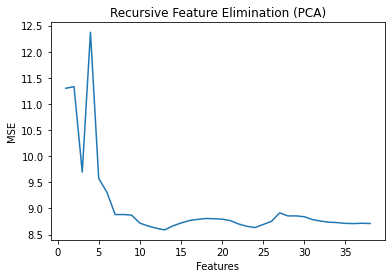

In [135]:
import matplotlib.pyplot as plt

cv_scores = -recur_elim.cv_results_['mean_test_score']
min_feats = recur_elim.min_features_to_select

rfe_axs[1,1].plot(range(min_feats, len(cv_scores)+min_feats), cv_scores, color='tab:blue')

plt.close()

plt.plot(range(min_feats, len(cv_scores)+min_feats), cv_scores)
plt.title('Recursive Feature Elimination (PCA)')
plt.ylabel('MSE')
plt.xlabel('Features')

I don't entirely understand why the error goes up sometimes :/

In [136]:
rfe_fig.set_size_inches(8,5)
rfe_fig.savefig('RFE.png', dpi=200)

In [137]:
recur_elim.ranking_

array([ 1, 18,  1, 17, 10, 12,  1, 25, 23,  8, 16, 20,  1, 15,  9,  2,  4,
       26, 24, 13,  1, 22,  6,  1,  1,  5,  7, 11,  1, 21,  1,  1, 19,  3,
        1, 14,  1,  1])

In [138]:
from sklearn.linear_model import RidgeCV, LassoCV

ridge = RidgeCV(scoring='neg_mean_squared_error', store_cv_values=True)
ridge.fit(X_train, y_train)

lasso = LassoCV(cv=len(y_train), n_jobs=-1)
lasso.fit(X_train, y_train)


LassoCV(cv=519, n_jobs=-1)

In [139]:
print(f'Ridge RMSE: {np.sqrt(MSE(ridge.predict(X_test),y_test))}')
print(f'Lasso RMSE: {np.sqrt(MSE(lasso.predict(X_test),y_test))}')

Ridge RMSE: 2.377413526609363
Lasso RMSE: 2.3805014353317966


0.1       1.0       10.0
0    0.247623  0.248077  0.252401
1   -2.756327 -2.755125 -2.743049
2    0.389112  0.388680  0.384300
3    1.832488  1.827719  1.782911
4    0.558175  0.560910  0.586701
..        ...       ...       ...
514  0.769604  0.769844  0.772097
515  0.715689  0.713986  0.697543
516 -0.914648 -0.912210 -0.888697
517 -0.722090 -0.722968 -0.731767
518 -5.085788 -5.080374 -5.027331

[519 rows x 3 columns]

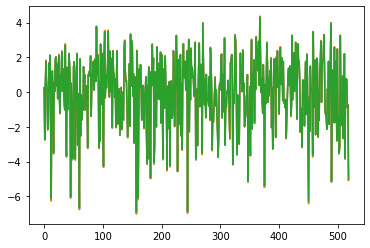

In [140]:
foo = pd.DataFrame(ridge.cv_values_,columns=ridge.alphas)
display(foo)
plt.plot(foo)
plt.show()

I don't understand why some of these are positive and some are negative

In [141]:
from sklearn.linear_model import Ridge

grid_param = {
    'alpha': [1e-3, 1e-2, 1e-1, 1]
}


kf = KFold(n_splits=5)
gs =  GridSearchCV(Ridge(), grid_param, scoring='neg_root_mean_squared_error',  cv=kf, return_train_score=False, n_jobs=-1).fit(X_train, y_train)

# plt.plot(pd.DataFrame(gs.cv_results_))
foo = pd.DataFrame(gs.cv_results_)
bar = -foo['mean_test_score'].rename(foo['param_alpha'])
bar

0.001    2.978375
0.010    2.978365
0.100    2.978263
1.000    2.977252
Name: mean_test_score, dtype: float64

Text(0, 0.5, 'MSE')

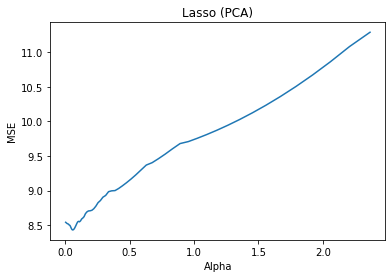

In [142]:
las_axs[1,1].plot(pd.DataFrame(lasso.mse_path_.T, columns=lasso.alphas_).mean(), color='tab:blue')

plt.close()

plt.plot(pd.DataFrame(lasso.mse_path_.T, columns=lasso.alphas_).mean())
plt.title('Lasso (PCA)')
plt.xlabel('Alpha')
plt.ylabel('MSE')

In [143]:
las_fig.set_size_inches(8,5)
las_fig.savefig('lasso.png', dpi=200)

In [144]:
lasso_coef = pd.Series(lasso.coef_, index=lasso.feature_names_in_)
print(f'Lasso: {lasso_coef[lasso_coef != 0].index}')

Lasso: Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC9', 'PC10', 'PC11',
       'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC20', 'PC21', 'PC23',
       'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC31', 'PC32', 'PC34',
       'PC35'],
      dtype='object')


## Random Forest

### Math

In [145]:
X_train, X_test, y_train, y_test = train_test_split(pca_df, data_math['G3'], test_size=0.2,random_state=0)

In [146]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# # Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'n_estimators':n_estimators,
    'max_features':max_features,
    'min_samples_leaf':min_samples_leaf,
    'bootstrap':bootstrap               
}

kf = KFold(n_splits=5)
search = RandomizedSearchCV(RandomForestRegressor(), random_grid, n_iter = 50, scoring='neg_mean_squared_error',  cv=kf, return_train_score=False, n_jobs=-1, verbose=4).fit(X_train, y_train)

display(pd.DataFrame(search.cv_results_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        3.803061      0.325587         0.053439        0.002671   
1        0.730339      0.029196         0.037008        0.002899   
2        2.947436      0.242654         0.157362        0.030142   
3        7.942936      0.553756         0.167025        0.012335   
4        1.319041      0.039060         0.070481        0.004435   
5        0.842047      0.088743         0.040077        0.002828   
6        2.503772      0.069533         0.146303        0.007691   
7        3.903996      0.354153         0.084829        0.019384   
8        3.115268      0.230774         0.051528        0.002439   
9        2.909470      0.194099         0.162052        0.016707   
10       3.271508      0.260282         0.058013        0.008369   
11       3.430831      0.187227         0.175863        0.011821   
12       1.256964      0.126424         0.022005        0.003578   
13       3.761482      0.202508         0.183945        0.008481   
14       2.845169      0.228892         0.136562        0.013365   
15       9.145241      1.011965         0.125651        0.004739   
16       2.157074      0.067109         0.107476        0.006571   
17       8.900399      0.751256         0.136451        0.014907   
18       2.365283      0.120580         0.123014        0.005623   
19      10.460388      0.854949         0.173485        0.008434   
20       9.127954      0.885904         0.152234        0.009788   
21      14.230684      1.282595         0.180841        0.028066   
22       2.458484      0.231202         0.124228        0.017178   
23       1.441586      0.039455         0.036529        0.001401   
24       6.637866      0.224168         0.173239        0.026162   
25       1.586772      0.089670         0.082819        0.009581   
26       5.278524      0.528651         0.149906        0.021458   
27       8.700831      0.969126         0.120343        0.004113   
28       2.912457      0.129414         0.080818        0.012986   
29       2.448992      0.240227         0.063117        0.009868   
30       4.399389      0.052661         0.119314        0.014666   
31       2.497436      0.194222         0.128436        0.008534   
32       1.361454      0.125180         0.083221        0.014373   
33       3.186996      0.229408         0.169584        0.036653   
34       6.339722      0.318954         0.131635        0.015067   
35       3.387857      0.146606         0.165101        0.003651   
36       7.125667      0.609573         0.150935        0.026591   
37       2.885401      0.237038         0.152817        0.018361   
38       3.539128      0.060013         0.183241        0.005194   
39       2.460344      0.223012         0.038609        0.004410   
40       0.870607      0.055487         0.021604        0.001855   
41       6.204970      0.339632         0.122392        0.010048   
42       2.938042      0.158616         0.145934        0.008421   
43       7.241687      0.398753         0.125685        0.013386   
44       3.053284      0.203732         0.161622        0.018440   
45       4.368586      0.412872         0.166144        0.004716   
46       4.710657      0.391272         0.063814        0.014895   
47       0.332650      0.025681         0.021620        0.006705   
48       3.312156      0.076536         0.054212        0.003817   
49       0.360481      0.012112         0.022006        0.004648   

   param_n_estimators param_min_samples_split param_min_samples_leaf  \
0                 600                      10                      1   
1                 400                      10                      1   
2                1600                      10                      2   
3                1800                       2                      2   
4                 800                      10                      2   
5                 400                       2                      1   
6                1600          

In [147]:
rf = RandomForestRegressor(**search.best_params_)
rf.fit(X_train, y_train)

# evaluating the test RMSE
display(np.sqrt(MSE(y_test, rf.predict(X_test))))

4.991616876950771

In [148]:
len(rf.estimators_)

1800

In [149]:
# evaluating the model
rf.score(X_test, y_test)

0.0968727980409847

In [150]:
# if we need this to plot anything
y_predicted = rf.predict(X_test)

In [151]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

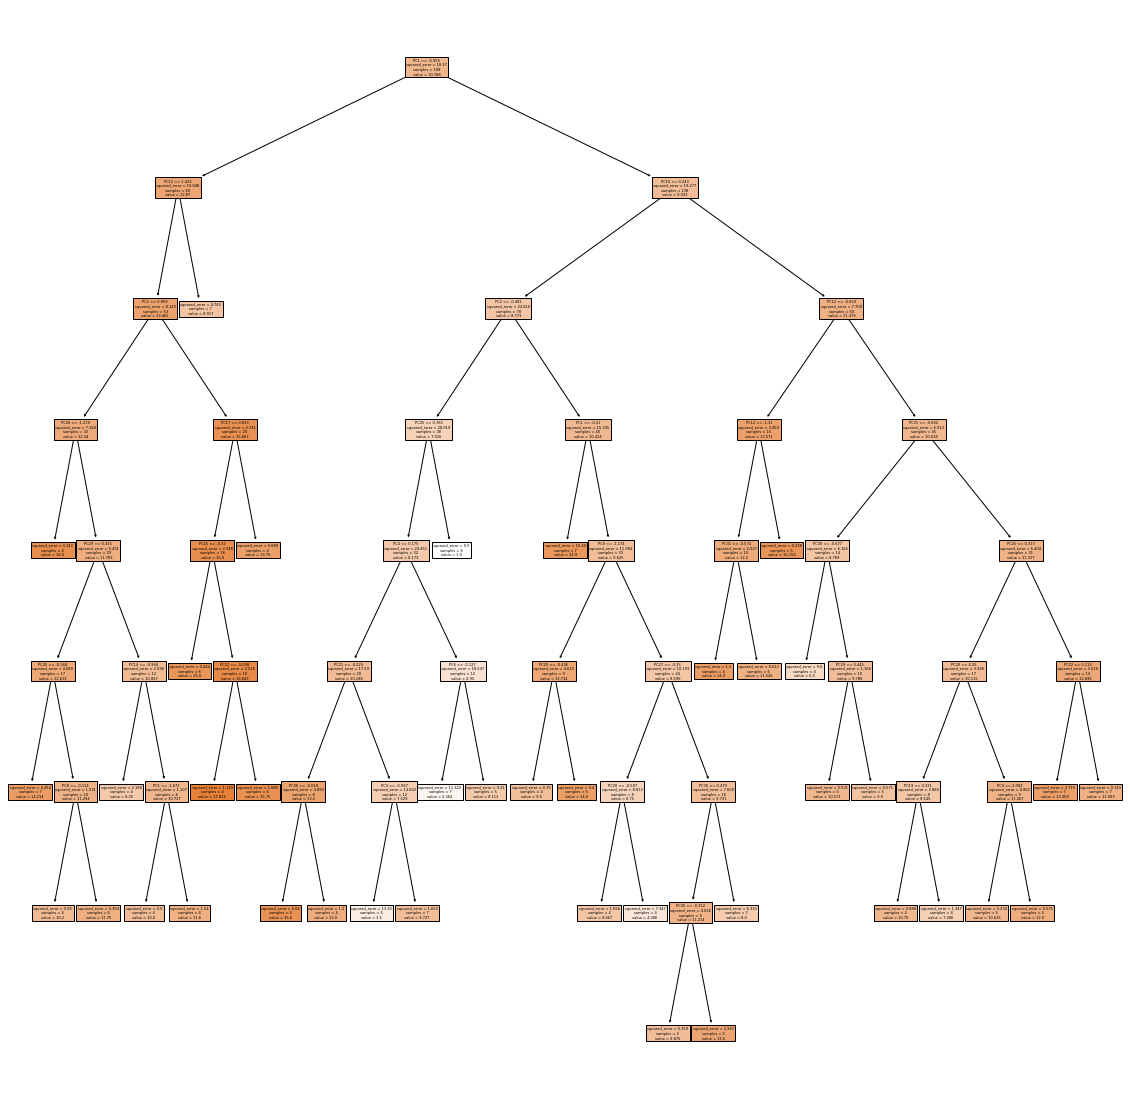

In [152]:
from sklearn import tree

fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf.estimators_[0], feature_names=X_train.columns, filled=True)
fig.savefig('original_tree.png')

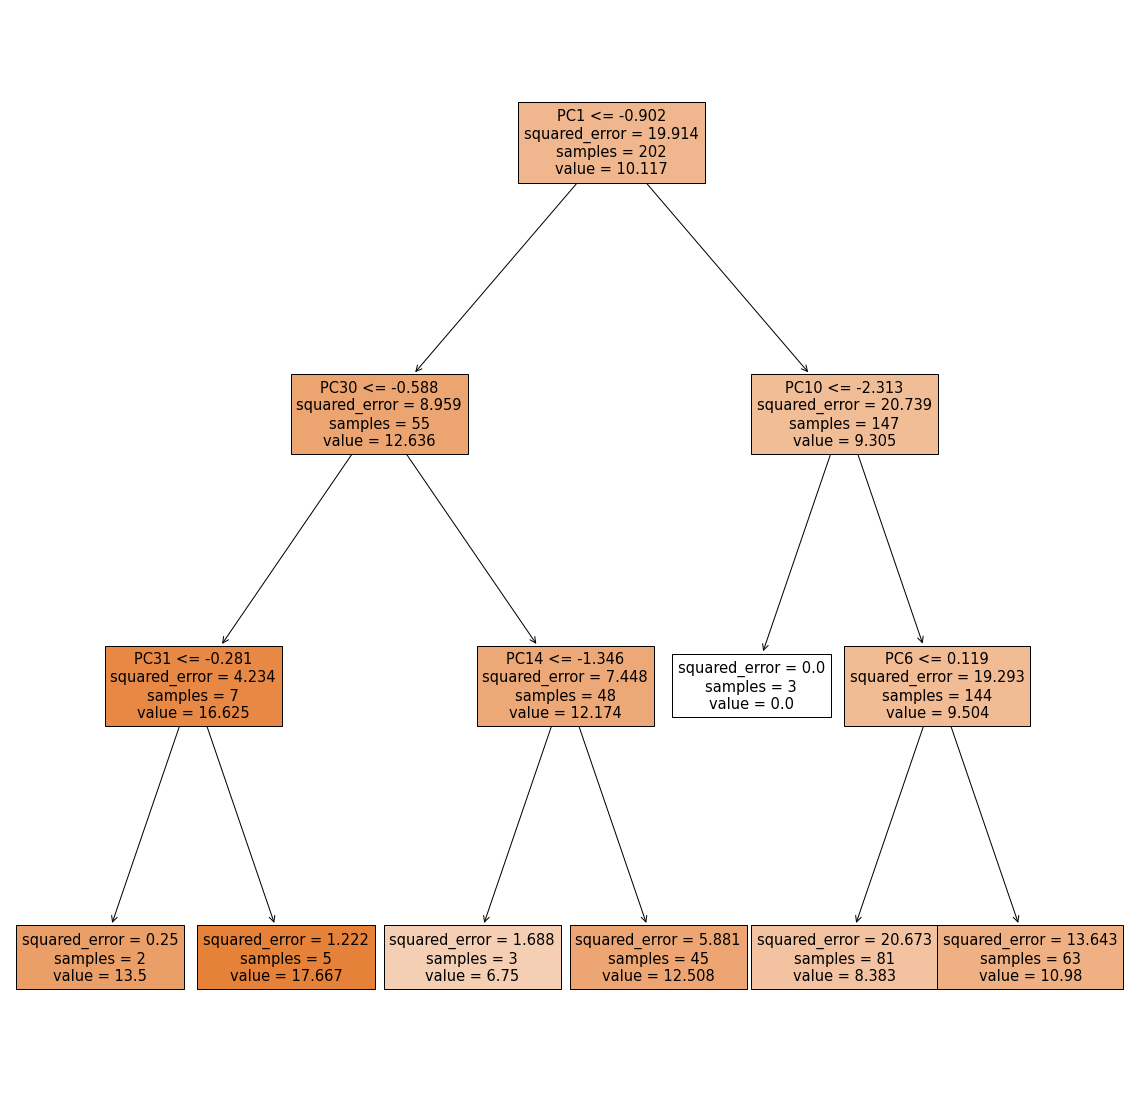

In [153]:
# pruning the tree to max depth of 3 just for visualization purposes
rf = RandomForestRegressor(n_estimators=100, max_depth=3)
rf.fit(X_train, y_train)
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf.estimators_[0], feature_names=X_train.columns, filled=True)
fig.savefig('Pruned_tree.png')

In [154]:
import pandas as pd

from sklearn import tree
from dtreeviz.trees import dtreeviz
from matplotlib import pyplot as plt

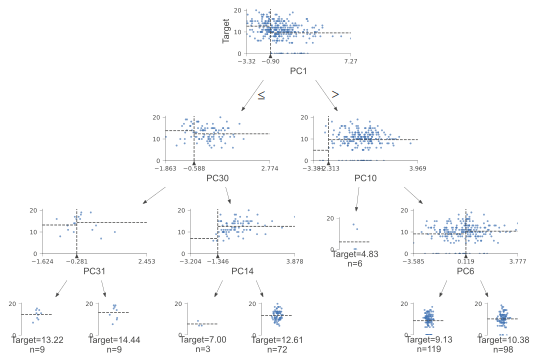

In [155]:
viz = dtreeviz(rf.estimators_[0], X_train, y_train, feature_names=X_train.columns, target_name="Target")
viz

## Language

In [156]:
X_train, X_test, y_train, y_test = train_test_split(pca_dframe_lang, data_lang['G3'], test_size=0.2,random_state=0)

In [157]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# # Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'n_estimators':n_estimators,
    'max_features':max_features,
    'min_samples_leaf':min_samples_leaf,
    'bootstrap':bootstrap               
}

kf = KFold(n_splits=5)
search = RandomizedSearchCV(RandomForestRegressor(), random_grid, n_iter = 50, scoring='neg_mean_squared_error',  cv=kf, return_train_score=False, n_jobs=-1, verbose=4).fit(X_train, y_train)

display(pd.DataFrame(search.cv_results_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        8.640963      0.639979         0.135031        0.013087   
1       12.336870      0.402875         0.204761        0.036014   
2       11.913158      0.457837         0.119229        0.017501   
3        3.630270      0.267546         0.155975        0.022000   
4       14.120957      0.402891         0.127431        0.011150   
5        0.736417      0.040823         0.029206        0.006082   
6       14.601997      0.355877         0.178640        0.021252   
7       25.122320      1.508722         0.200665        0.011653   
8        2.908701      0.217657         0.111625        0.008263   
9        5.828668      0.383603         0.058189        0.004163   
10       4.781686      0.262111         0.192002        0.031067   
11       3.042044      0.205645         0.037416        0.003720   
12       3.707970      0.294964         0.131030        0.024295   
13       2.854493      0.218614         0.114626        0.006345   
14      10.865579      0.317900         0.158239        0.008735   
15       2.644578      0.131036         0.121246        0.017086   
16       1.114054      0.140666         0.043410        0.004759   
17       1.913123      0.110044         0.082619        0.011041   
18       5.783561      0.471511         0.178843        0.014553   
19      10.684996      0.628502         0.097022        0.006294   
20       2.315869      0.225741         0.104102        0.018834   
21      10.531254      0.411708         0.117144        0.025062   
22       9.121164      0.421245         0.090496        0.011433   
23      14.312595      0.357746         0.146641        0.023317   
24       8.753694      0.621980         0.129629        0.018352   
25      11.257720      0.993890         0.115053        0.008821   
26       1.971325      0.219317         0.019804        0.004167   
27       4.111114      0.188390         0.167240        0.011895   
28       4.169207      0.274877         0.176480        0.013436   
29       3.695562      0.321336         0.136286        0.014398   
30       4.698799      0.362786         0.179594        0.015222   
31       8.158511      0.140685         0.133105        0.015717   
32       5.712625      0.702360         0.083900        0.010214   
33      12.415889      0.813051         0.174439        0.013635   
34       3.152533      0.302982         0.123898        0.021904   
35       4.525921      0.354297         0.056411        0.002655   
36       8.800104      0.637468         0.080618        0.009396   
37       5.480436      0.246005         0.082619        0.009565   
38       7.029522      0.363423         0.107642        0.007276   
39       1.540548      0.141121         0.066015        0.012604   
40      16.724470      0.958965         0.195675        0.030171   
41       3.329485      0.169673         0.142032        0.012995   
42       1.113293      0.135160         0.041013        0.003038   
43      13.272429      0.692581         0.174261        0.003282   
44       2.558974      0.211161         0.040209        0.002787   
45       3.578719      0.226166         0.141777        0.031489   
46       5.201096      0.460620         0.207750        0.023465   
47       6.248339      0.363984         0.088445        0.009421   
48       9.559816      0.237076         0.110871        0.005396   
49      16.371897      0.928386         0.108661        0.005140   

   param_n_estimators param_min_samples_split param_min_samples_leaf  \
0                1200                       5                      2   
1                1600                       5                      1   
2                1000                       2                      2   
3                1400                       2                      4   
4                1400                       5                      4   
5                 200                       2                      2   
6                1800          

In [158]:
rf = RandomForestRegressor(**search.best_params_)
rf.fit(X_train, y_train)

# evaluating the test RMSE
display(np.sqrt(MSE(y_test, rf.predict(X_test))))

2.516211036693202

In [159]:
# stuff!!
RandomForestRegressor().get_params().keys()
# evaluating the model
rf.score(X_test, y_test)
# if we need this to plot anything
y_predicted = rf.predict(X_test)

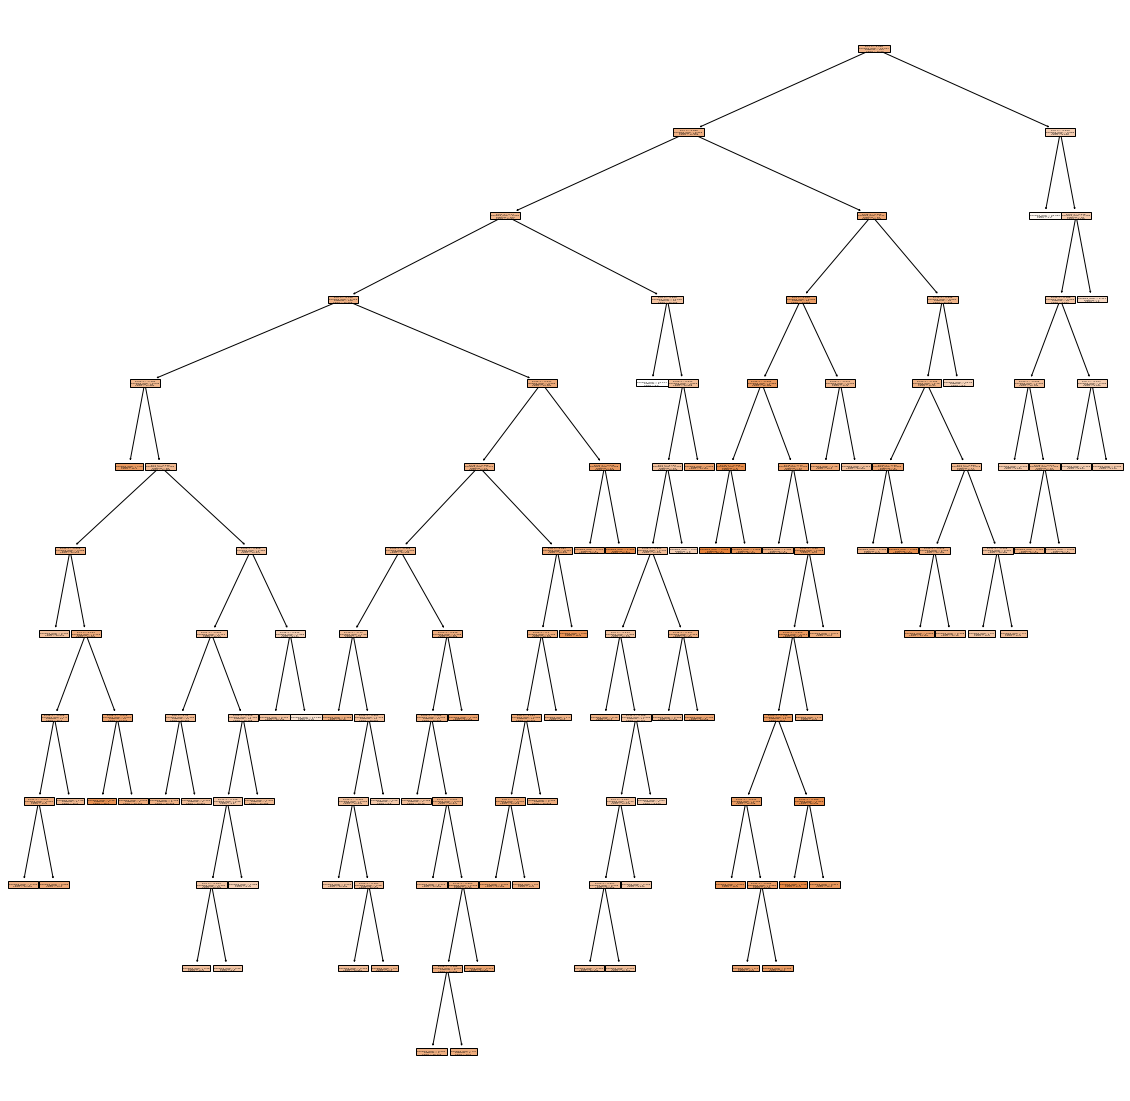

In [160]:
# visualizations 1
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf.estimators_[0], feature_names=X_train.columns, filled=True)
fig.savefig('original_tree_lang.png')

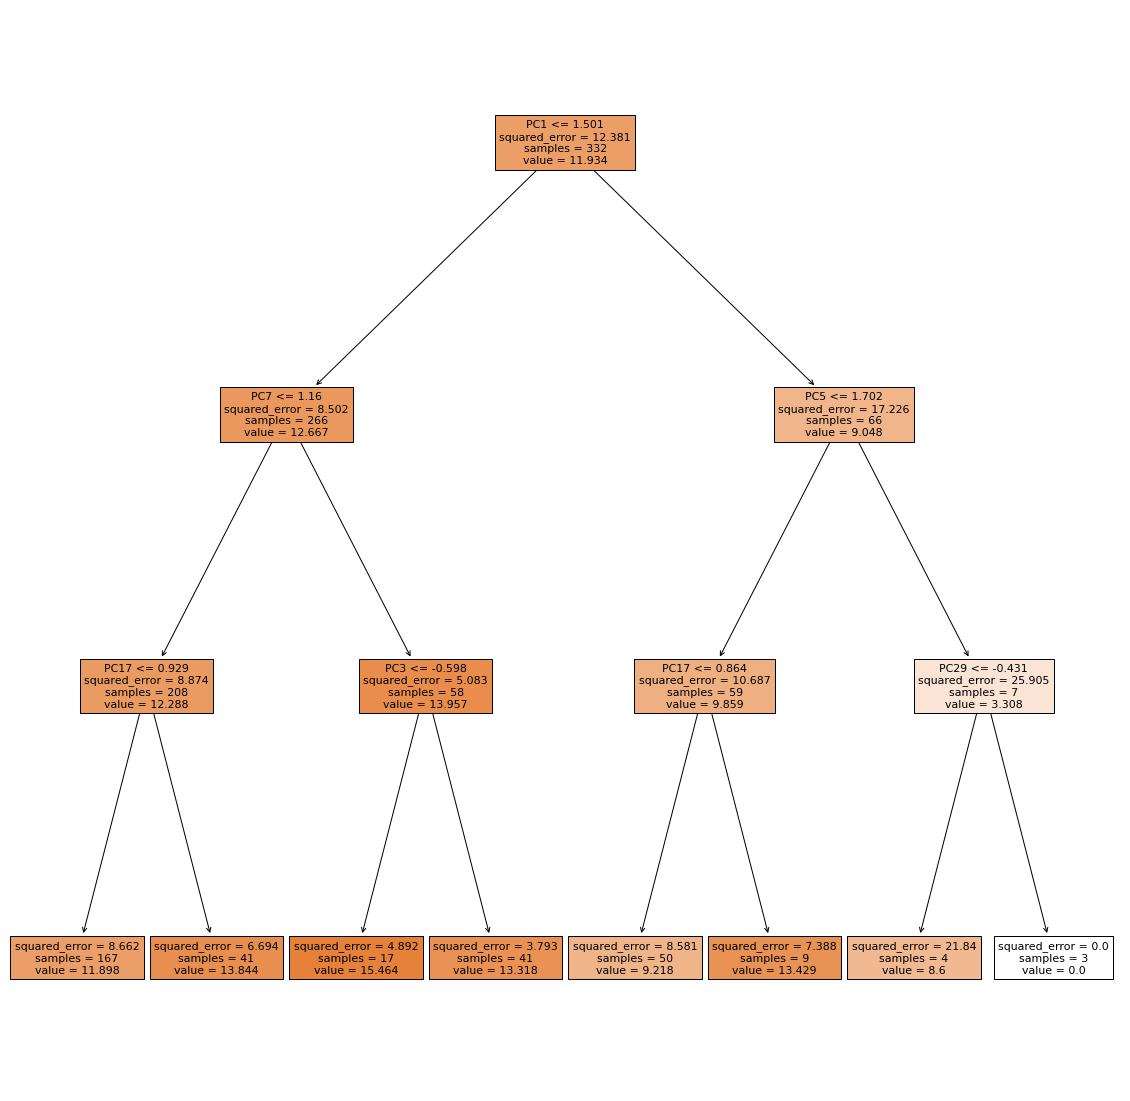

In [161]:
#visualization 2, pruning the tree
rf = RandomForestRegressor(n_estimators=100, max_depth=3)
rf.fit(X_train, y_train)
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf.estimators_[0], feature_names=X_train.columns, filled=True)
fig.savefig('Pruned_tree_lang.png')

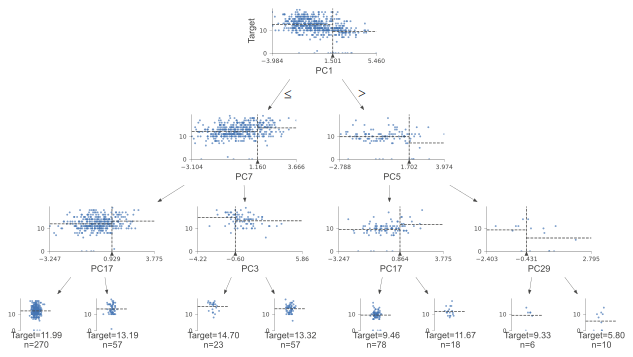

In [162]:
#visualization 3
viz = dtreeviz(rf.estimators_[0], X_train, y_train, feature_names=X_train.columns, target_name="Target")
viz

In [163]:
viz.save("decision_tree_house.svg")

In [164]:
pca_df.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19',
       'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28',
       'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37',
       'PC38', 'PC39', 'PC40'],
      dtype='object')

In [165]:
pca_dframe_lang.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19',
       'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28',
       'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37',
       'PC38'],
      dtype='object')